In [1]:
import pandas as pd
import pyreadstat as pyreadstat

#dataframe, meta = pyreadstat.read_sav(r"C:\Users\Alexkeks\Downloads\RLMS_HH_1994_2022_v4\RLMS_HH_1994_2022_v4.sav")
dataframe, meta = pyreadstat.read_sav(r"C:\Users\Alexkeks\Downloads\RLMS_IND_1994_2022_2023_09_01_1_v3_rus\RLMS_IND_1994_2022_2023_09_01_1_v3_rus.sav")

In [2]:
!pip install pyreadstat

     ---------------------------------------- 2.4/2.4 MB 8.1 MB/s eta 0:00:00


In [47]:
open(r"C:\Users\Alexkeks\Downloads\RLMS_HH_1994_2022_v4\questions", "w").write('\n'.join(meta.column_labels))



175277

In [21]:
meta.variable_value_labels['J72.21']

{1.0: 'ВСЕ ВРЕМЯ', 2.0: 'НЕ ВСЕ ВРЕМЯ'}

In [34]:
col = 'J72.21'
print(meta.column_names_to_labels[col])
d=dataframe[dataframe[col].notnull()][col].value_counts()

[(meta.variable_value_labels['J72.21'].get(k),v) for k,v in d.items()]

Вы работали по полученной или близкой к ней специальности все время или не все время?


[('ВСЕ ВРЕМЯ', 3310), ('НЕ ВСЕ ВРЕМЯ', 2774)]

In [14]:
[(col, labels) for col, labels in meta.column_names_to_labels.items() if 'спец' in labels]

[('J21.4',
  'Собираетесь ли Вы работать на вредном производстве после того, как выработаете специальный стаж, дающий Вам право на досрочное назначение трудовой пенсии?'),
 ('J721DAC08',
  'Код профессии по ISCO2008 первой специальности профессиональных курсов'),
 ('J721DBC08',
  'Код профессии по ISCO2008 второй специальности профессиональных курсов'),
 ('J721DCC08',
  'Код профессии по ISCO2008 третьей специальности профессиональных курсов'),
 ('J721DDC08',
  'Код профессии по ISCO2008 четвертой специальности профессиональных курсов'),
 ('J721DEC08',
  'Код профессии по ISCO2008 пятой специальности профессиональных курсов'),
 ('J722DAC08',
  'Код профессии по ISCO2008 первой специальности ПТУ, ФЗУ, ФЗО без среднего образования'),
 ('J722DBC08',
  'Код профессии по ISCO2008 второй специальности ПТУ, ФЗУ, ФЗО без среднего образования'),
 ('J723DAC08',
  'Код профессии по ISCO2008 первой специальности ПТУ со средним образованием, технического училища'),
 ('J723DBC08',
  'Код профессии п

In [5]:
dataframe=dataframe[dataframe['YEAR']==2008]

df=dataframe

df['J72.21']=df['J72.21'].map(meta.variable_value_labels['J72.21'])

df['H5']=df['H5'].map(meta.variable_value_labels['H5'])

df['J72.19A']=df['J72.19A'].map(meta.variable_value_labels['J72.19A'])

df['J72.20']=df['J72.20'].map(meta.variable_value_labels['J72.20'])

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
col = 'J72.19A'


#print(df[df['H5']<100].groupby(['H5', col]).size().unstack().reset_index().plot.bar())



sns.countplot(data=df[df['AGE']<100], y=col, hue='H5')


"""for col, labels in meta.column_names_to_labels.items(): 
    if col.startswith('J72.'):
        print(meta.column_names_to_labels[col])
        print([(meta.variable_value_labels[col].get(label, label), cnt) for label, cnt in dataframe[dataframe[col].notnull()][col].value_counts().items()])"""
    


NameError: name 'df' is not defined

<Axes: xlabel='count', ylabel='J72.20'>

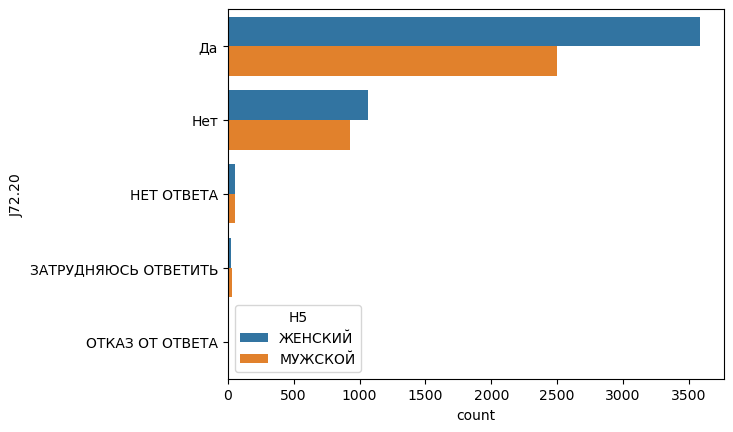

In [85]:
col='J72.20'

sns.countplot(data=df[df['AGE']<100], y=col, hue='H5')

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

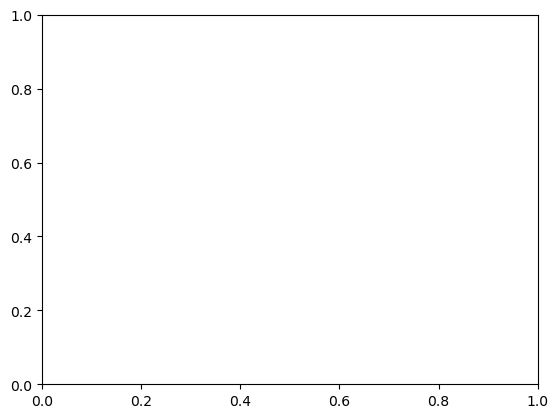

In [9]:
for k, v in meta.column_names_to_labels.items():
    if v=='Оцените в какой мере Ваша нынешняя работа требует того уровня образования, который Вы получили в учебном учреждении?':
        print(k)


J72.25


In [11]:
meta.variable_value_labels['J72.25']

{1.0: 'Ваш уровень образования выше, чем требуется',
 2.0: 'Ваш уровень образования примерно соответствует тому, что требуется',
 3.0: 'Ваш уровень образования ниже того, что требуется',
 99999997.0: 'ЗАТРУДНЯЮСЬ ОТВЕТИТЬ',
 99999998.0: 'ОТКАЗ ОТ ОТВЕТА',
 99999999.0: 'НЕТ ОТВЕТА'}

C:\Users\Alexkeks\AppData\Local\Temp\ipykernel_21360\2517685815.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1[col]=df_1[col].map(meta.variable_value_labels[col])


[Text(0.5, 1.0, 'Вы сами работали по полученной или близкой к ней специальности после получения образования в учебном учреждении?')]

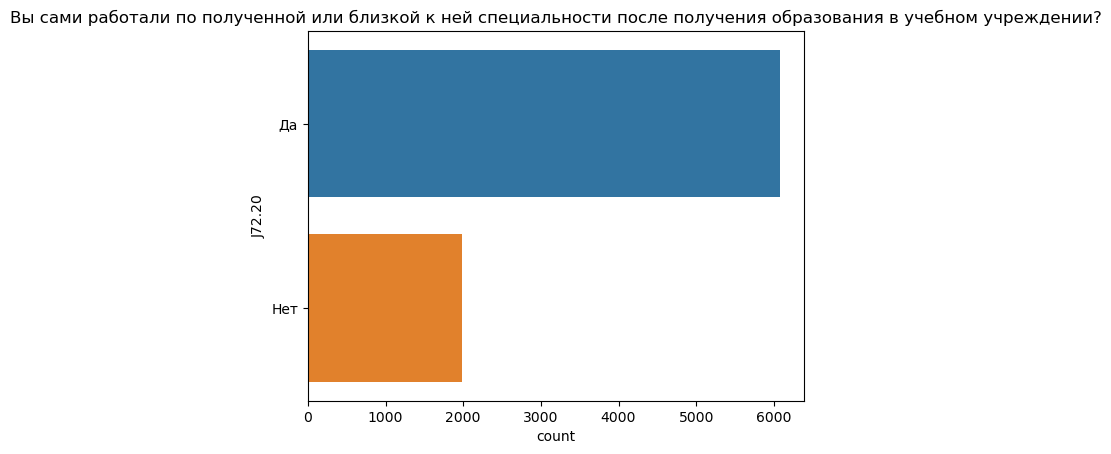

In [205]:
col = 'J72.20'
df_1 = dataframe[dataframe[col]<=3]
df_1[col]=df_1[col].map(meta.variable_value_labels[col])
sns.countplot(data=df_1[df_1['AGE']<100], y=col).set(title = meta.column_names_to_labels[col])


In [25]:
df_1 = df_1[df_1['J13.2'].notnull()]

,ID_W,IDIND,YEAR,REDID_I,ID_I,ID_H,ORIGSM,INWGT,REGION,PSU,...,S6,S7,S1.1_L,S1.2_L,S2_L,S3_L,S4_L,S5_L,S6_L,S7_L
145442,17.0,5.0,2008.0,182903.0,10100203.0,101002.0,1.0,1.046947,1.0,6.0,...,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
145444,17.0,9.0,2008.0,183101.0,10100501.0,101005.0,1.0,0.792921,1.0,6.0,...,3.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
145445,17.0,11291.0,2008.0,183201.0,10100701.0,101007.0,1.0,0.800482,1.0,6.0,...,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
145446,17.0,30113.0,2008.0,183301.0,10100801.0,101008.0,1.0,1.046947,1.0,6.0,...,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
145449,17.0,3.0,2008.0,183601.0,10105101.0,101051.0,0.0,0.000000,1.0,6.0,...,3.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194788,19.0,39835.0,2010.0,792301.0,161052401.0,1610524.0,1.0,1.071100,161.0,32.0,...,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
194789,19.0,39836.0,2010.0,792302.0,161052402.0,1610524.0,1.0,1.233285,161.0,32.0,...,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
194795,19.0,39842.0,2010.0,792602.0,161053002.0,1610530.0,1.0,1.039878,161.0,32.0,...,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
194796,19.0,39843.0,2010.0,792603.0,161053003.0,1610530.0,1.0,1.071100,161.0,32.0,...,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


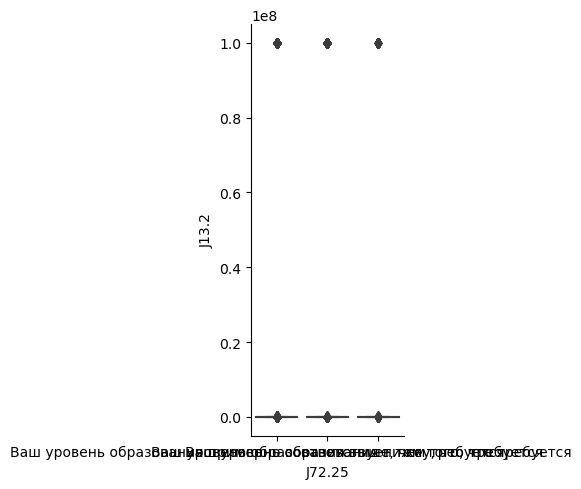

C:\Users\Alexkeks\AppData\Local\Temp\ipykernel_21360\1531636981.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1[col]=df_1[col].map(meta.variable_value_labels[col])


{1.0: 'окончил 0 - 6 классов', 2.0: 'незаконченное среднее образование (7 - 8 кл)', 3.0: 'незаконченное среднее образование (7 - 8 кл) + что-то еще', 4.0: 'законченное среднее образование', 5.0: 'законченное среднее специальное образование', 6.0: 'законченное высшее образование и выше', 99999997.0: 'ЗАТРУДНЯЮСЬ ОТВЕТИТЬ', 99999998.0: 'ОТКАЗ ОТ ОТВЕТА', 99999999.0: 'НЕТ ОТВЕТА'}


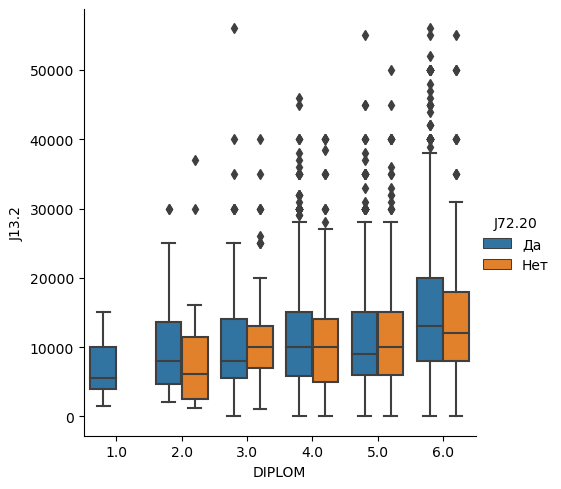

In [211]:
col = 'J72.20'
df_1 = dataframe[dataframe[col]<=3]
df_1[col]=df_1[col].map(meta.variable_value_labels[col])

df_1=df_1[df_1['J13.2']<60000]
df_1=df_1[df_1['DIPLOM'] < 100]
col = 'DIPLOM'
#df_1[col]=df_1[col].map(meta.variable_value_labels[col])
print(meta.variable_value_labels[col])

sns.catplot(data=df_1, x='DIPLOM', y='J13.2',hue='J72.20', kind='box')

Смотрим на медиану
Вывод: Over образованные зарабвтывают меньше, чем с соответствующим уровнем образования и under образованные

In [210]:
df_1

,ID_W,IDIND,YEAR,REDID_I,ID_I,ID_H,ORIGSM,INWGT,REGION,PSU,...,S6,S7,S1.1_L,S1.2_L,S2_L,S3_L,S4_L,S5_L,S6_L,S7_L
145442,17.0,5.0,2008.0,182903.0,1.010020e+07,101002.0,1.0,1.046947,1.0,6.0,...,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
145444,17.0,9.0,2008.0,183101.0,1.010050e+07,101005.0,1.0,0.792921,1.0,6.0,...,3.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
145445,17.0,11291.0,2008.0,183201.0,1.010070e+07,101007.0,1.0,0.800482,1.0,6.0,...,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
145447,17.0,11292.0,2008.0,183401.0,1.010110e+07,101011.0,1.0,0.792921,1.0,6.0,...,3.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
145448,17.0,21443.0,2008.0,183502.0,1.010120e+07,101012.0,1.0,0.800482,1.0,6.0,...,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159460,17.0,21440.0,2008.0,103202.0,2.411624e+09,24116235.0,1.0,0.800482,141.0,1.0,...,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
159461,17.0,25019.0,2008.0,103301.0,2.411624e+09,24116240.0,1.0,0.792921,141.0,1.0,...,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
159462,17.0,21441.0,2008.0,103403.0,2.411625e+09,24116252.0,0.0,0.000000,141.0,1.0,...,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
159463,17.0,24099.0,2008.0,103404.0,2.411625e+09,24116252.0,0.0,0.000000,141.0,1.0,...,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


C:\Users\Alexkeks\AppData\Local\Temp\ipykernel_21360\2336243196.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1[col]=df_1[col].map(meta.variable_value_labels[col])


{1.0: 'окончил 0 - 6 классов', 2.0: 'незаконченное среднее образование (7 - 8 кл)', 3.0: 'незаконченное среднее образование (7 - 8 кл) + что-то еще', 4.0: 'законченное среднее образование', 5.0: 'законченное среднее специальное образование', 6.0: 'законченное высшее образование и выше', 99999997.0: 'ЗАТРУДНЯЮСЬ ОТВЕТИТЬ', 99999998.0: 'ОТКАЗ ОТ ОТВЕТА', 99999999.0: 'НЕТ ОТВЕТА'}


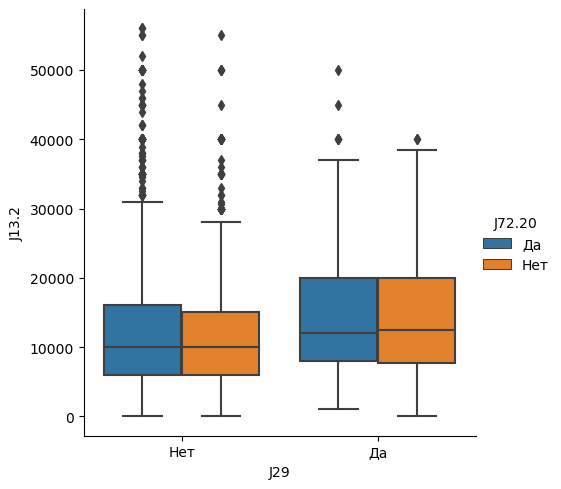

In [213]:
col = 'J29'
df_1 = dataframe[dataframe[col].notnull()]
df_1 = dataframe[dataframe[col]<3]
df_1[col]=df_1[col].map(meta.variable_value_labels[col])
df_1=df_1[df_1['J72.20']<=3]
df_1['J72.20']=df_1['J72.20'].map(meta.variable_value_labels['J72.20'])
df_1=df_1[df_1['J13.2']<60000]
df_1=df_1[df_1['DIPLOM'] < 100]
col = 'DIPLOM'
#df_1[col]=df_1[col].map(meta.variable_value_labels[col])
print(meta.variable_value_labels[col])

sns.catplot(data=df_1, x='J29', y='J13.2',hue='J72.20', kind='box')

Люди, которые занимаются предпринимательской деятельностью больше зарабатывают, а образовательно профессиональное несоответствие положительно сказывается на их зарплате

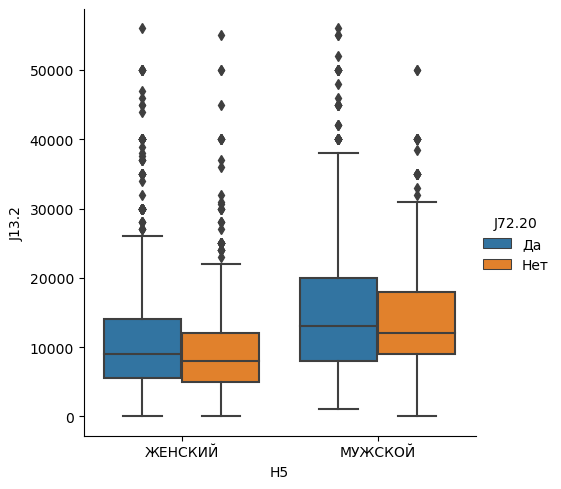

In [219]:
col = 'H5'
df_1 = dataframe[dataframe[col].notnull()]
df_1[col]=df_1[col].map(meta.variable_value_labels[col])
df_1 = df_1[df_1['J29'].notnull()]
df_1=df_1[df_1['J72.20']<=3]
df_1['J72.20']=df_1['J72.20'].map(meta.variable_value_labels['J72.20'])
df_1=df_1[df_1['J13.2']<60000]
df_1=df_1[df_1['DIPLOM'] < 100]
col = 'DIPLOM'
#df_1[col]=df_1[col].map(meta.variable_value_labels[col])
#print(meta.variable_value_labels[col])

sns.catplot(data=df_1, x='H5', y='J13.2',hue='J72.20', kind='box')

Мужчины получают больше, а среди женщин меньше всего получают те, у который уровень образования выше, чем требуется 

In [231]:
def norm_bar_plot(col):
    # col='J1.1.'+str(i)
    df_1 = dataframe[dataframe[col].notnull()]
    df_1 = df_1[df_1[col]<=10]
    df_1 = df_1[df_1['J72.25']<=10]
    df_1['J72.25']=df_1['J72.25'].map(meta.variable_value_labels['J72.25'])
    df_1[col]=df_1[col].map(meta.variable_value_labels[col])
    # sns.countplot(data=df_1[df_1['AGE']<100], y=col, hue='J72.25')
    x='J72.25'
    y=col
    data = (df_1
    .groupby(x)[y]
    .value_counts(normalize=True)
    .mul(100)
    .rename('percent')
    .reset_index())
    
    #((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar')
    p = sns.catplot(x=x, y="percent", hue=y, data=data, kind='bar').set(title = meta.column_names_to_labels[col])
    #_ = plt.setp(p.get_xticklabels(), rotation=90)  # Rotate labels
    p.set_xticklabels(rotation=10)

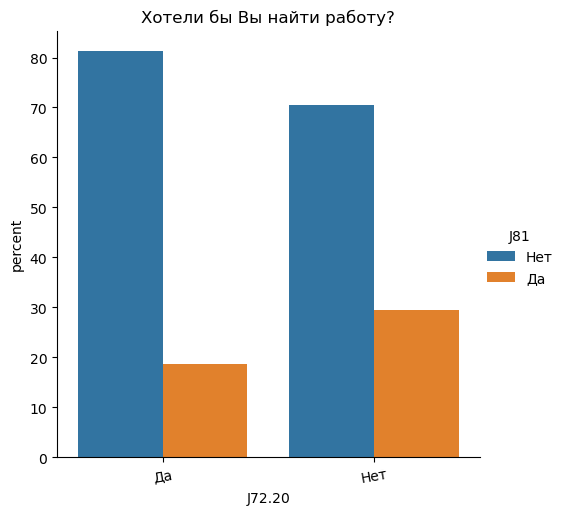

In [233]:
norm_bar_plot_1('J81')

In [222]:
def norm_bar_plot_1(col):
    # col='J1.1.'+str(i)
    df_1 = dataframe[dataframe[col].notnull()]
    df_1 = df_1[df_1[col]<=10]
    df_1 = df_1[df_1['J72.20']<=10]
    df_1['J72.20']=df_1['J72.20'].map(meta.variable_value_labels['J72.20'])
    df_1[col]=df_1[col].map(meta.variable_value_labels[col])
    # sns.countplot(data=df_1[df_1['AGE']<100], y=col, hue='J72.25')
    x='J72.20'
    y=col
    data = (df_1
    .groupby(x)[y]
    .value_counts(normalize=True)
    .mul(100)
    .rename('percent')
    .reset_index()
    )
    #((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar')
    p = sns.catplot(x=x, y="percent", hue=y, data=data, kind='bar').set(title = meta.column_names_to_labels[col])
    #_ = plt.setp(p.get_xticklabels(), rotation=90)  # Rotate labels
    p.set_xticklabels(rotation=10)

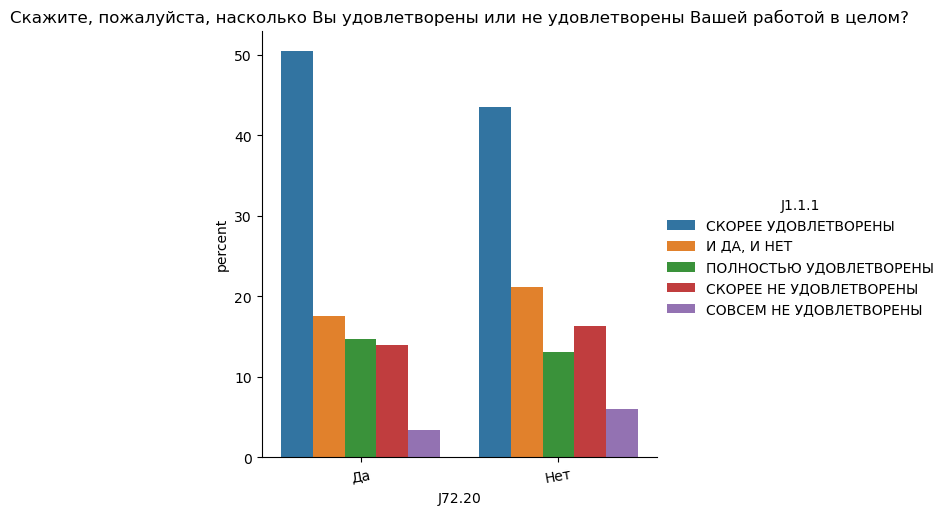

In [223]:
norm_bar_plot_1('J1.1.1')

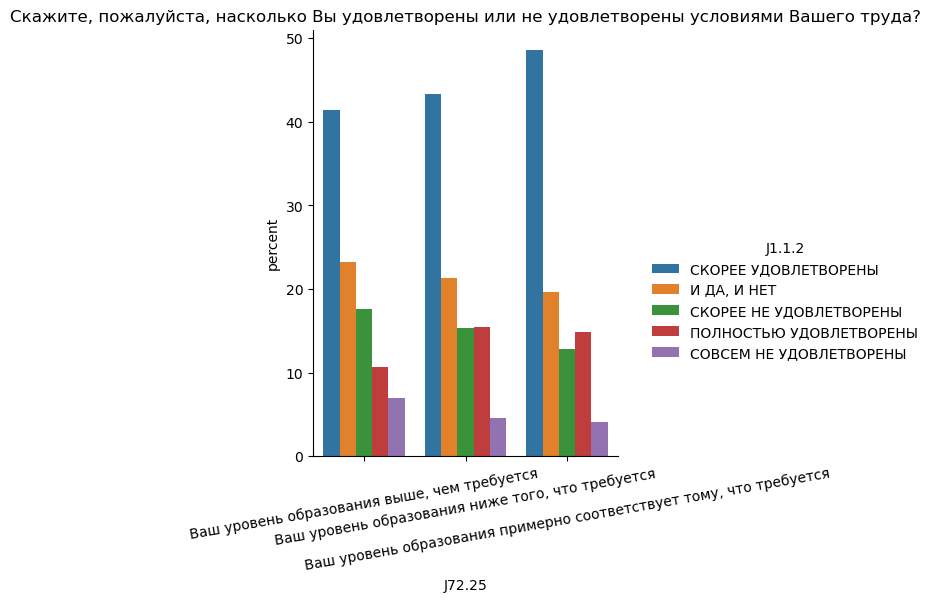

In [117]:
norm_bar_plot('J1.1.2')

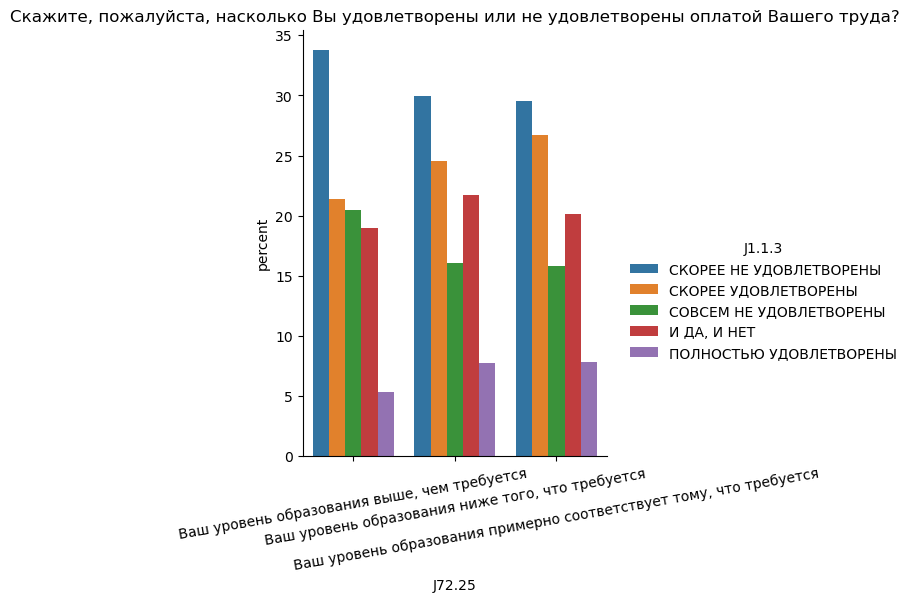

In [118]:
norm_bar_plot('J1.1.3')

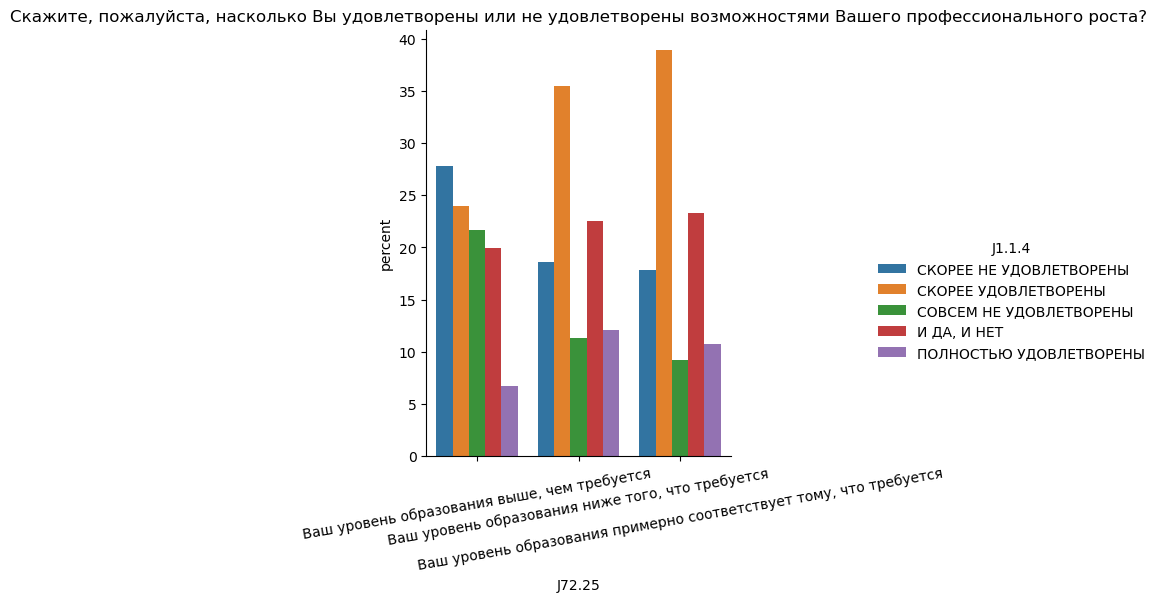

In [119]:
norm_bar_plot('J1.1.4')

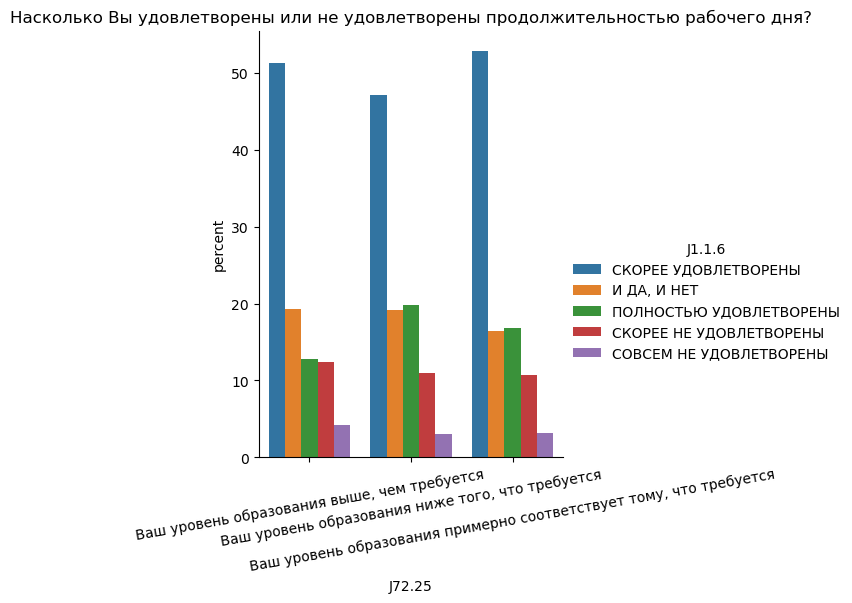

In [120]:
norm_bar_plot('J1.1.6')

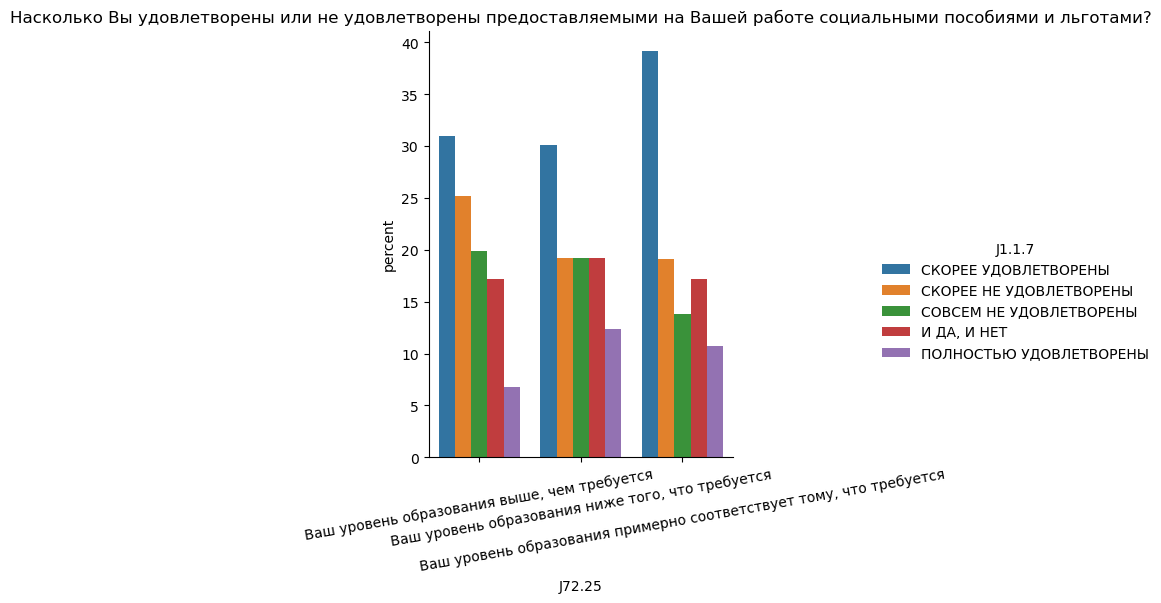

In [121]:
norm_bar_plot('J1.1.7')

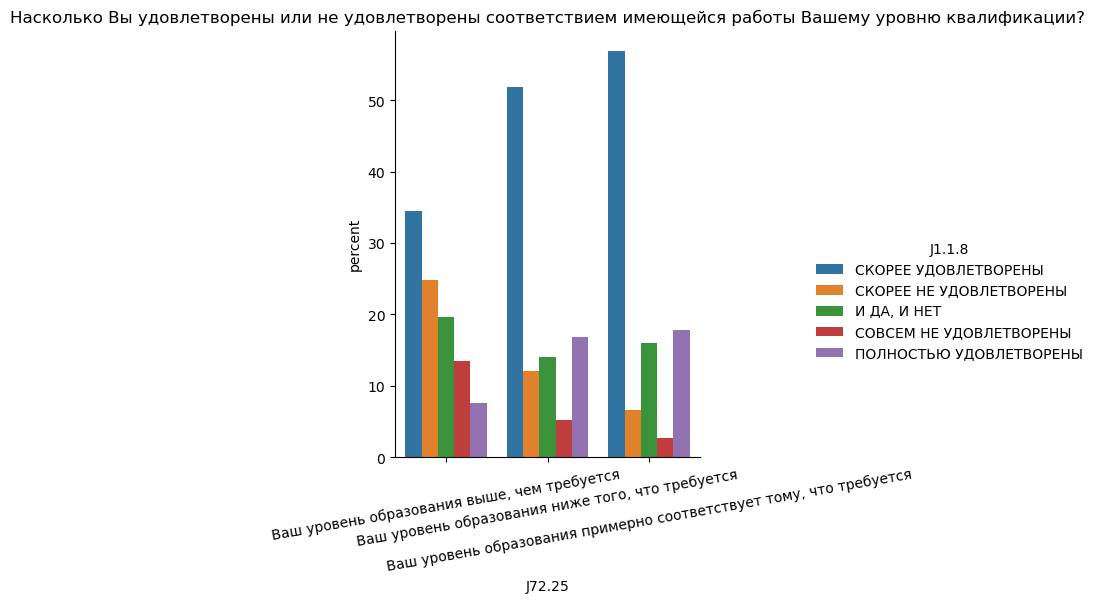

In [122]:
norm_bar_plot('J1.1.8')

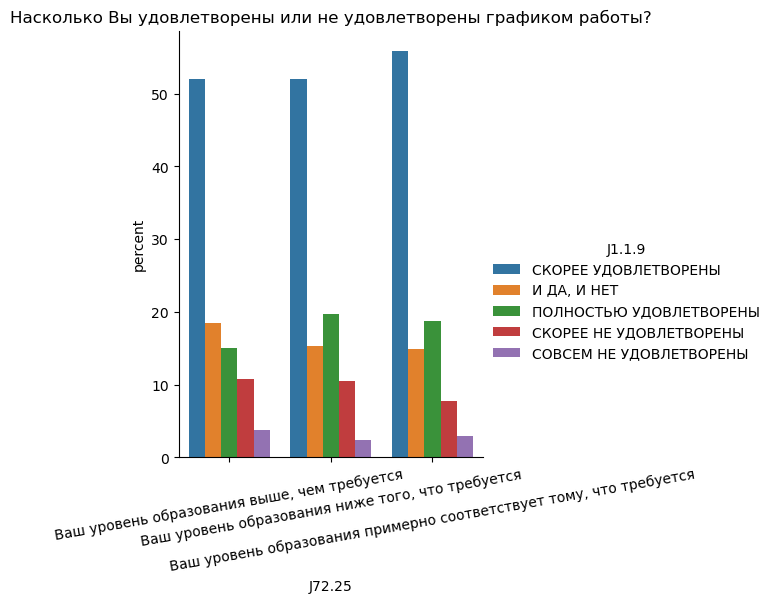

In [123]:
norm_bar_plot('J1.1.9')

C:\Users\Alexkeks\AppData\Local\Temp\ipykernel_3188\2418895118.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1[col]=df_1[col].map(meta.variable_value_labels[col])


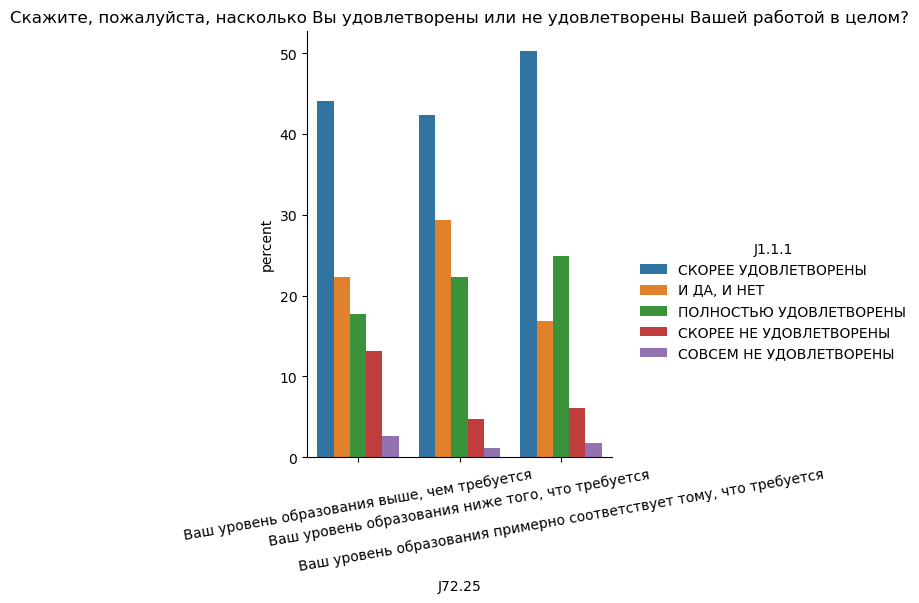

In [133]:
col = 'J29'
df_1 = dataframe[dataframe[col].notnull()]
df_1[col]=df_1[col].map(meta.variable_value_labels[col])
df_1=df_1[df_1[col]=='Да']
col='J1.1.1'
df_1 = df_1[df_1[col].notnull()]
df_1 = df_1[df_1[col]<=10]
df_1 = df_1[df_1['J72.25']<=10]
df_1['J72.25']=df_1['J72.25'].map(meta.variable_value_labels['J72.25'])
df_1[col]=df_1[col].map(meta.variable_value_labels[col])
# sns.countplot(data=df_1[df_1['AGE']<100], y=col, hue='J72.25')
x='J72.25'
y=col
data = (df_1
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index())

#((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar')
p = sns.catplot(x=x, y="percent", hue=y, data=data, kind='bar').set(title = meta.column_names_to_labels[col])
#_ = plt.setp(p.get_xticklabels(), rotation=90)  # Rotate labels
p.set_xticklabels(rotation=10)

C:\Users\Alexkeks\AppData\Local\Temp\ipykernel_3188\1319788581.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1[col]=df_1[col].map(meta.variable_value_labels[col])


ValueError: number of labels (2) does not match number of bars (3).

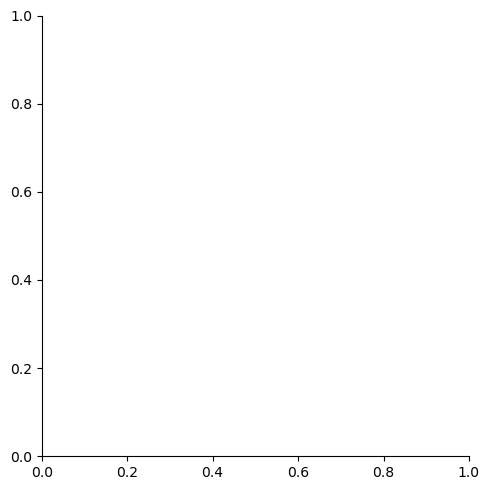

In [143]:
col = 'J29'
df_1 = dataframe[dataframe[col].notnull()]
df_1[col]=df_1[col].map(meta.variable_value_labels[col])
#df_1=df_1[df_1[col]=='Нет']
col='J1.1.1'
df_1 = df_1[df_1[col].notnull()]
df_1 = df_1[df_1[col]<=10]
df_1 = df_1[df_1['J72.25']<=10]
df_1['J72.25']=df_1['J72.25'].map(meta.variable_value_labels['J72.25'])
df_1[col]=df_1[col].map(meta.variable_value_labels[col])
# sns.countplot(data=df_1[df_1['AGE']<100], y=col, hue='J72.25')
x='J72.25'
y=col
data = (df_1
.groupby(x)[[y, 'J29']]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
       )

#((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar')
p = sns.catplot(x=x, y="percent", hue=data[[y, 'J29']].apply(tuple,axis=1), data=data, kind='bar').set(title = meta.column_names_to_labels[col])
#_ = plt.setp(p.get_xticklabels(), rotation=90)  # Rotate labels
p.set_xticklabels(rotation=10)
data

In [76]:
def norm_bar_plot_filter_by(col, col_filter, val_filter):
    df_1 = dataframe[dataframe[col_filter].notnull()]
    df_1[col_filter] = df_1[col_filter].map(meta.variable_value_labels[col_filter])
    df_1=df_1[df_1[col_filter] == val_filter]
    
    df_1 = df_1[df_1[col].notnull()]
    df_1 = df_1[df_1[col]<=10]
    df_1 = df_1[df_1['J72.25']<=10]
    df_1['J72.25']=df_1['J72.25'].map(meta.variable_value_labels['J72.25'])
    df_1[col]=df_1[col].map(meta.variable_value_labels[col])
    # sns.countplot(data=df_1[df_1['AGE']<100], y=col, hue='J72.25')
    x='J72.25'
    y=col
    data = (df_1
    .groupby(x)[y]
    .value_counts(normalize=True)
    .mul(100)
    .rename('percent')
    .reset_index())

    #((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar')
    p = sns.catplot(x=x, y="percent", hue=y, data=data, kind='bar', ax = axes[0]).set(title = meta.column_names_to_labels[col])
    #_ = plt.setp(p.get_xticklabels(), rotation=90)  # Rotate labels
    p.set_xticklabels(rotation=10)

In [77]:
norm_bar_plot_filter_by('J1.1.1', 'J29', 'Да')

C:\Users\Alexkeks\AppData\Local\Temp\ipykernel_21360\3422970177.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1[col_filter] = df_1[col_filter].map(meta.variable_value_labels[col_filter])


NameError: name 'axes' is not defined

C:\Users\Alexkeks\AppData\Local\Temp\ipykernel_3188\3422970177.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1[col_filter] = df_1[col_filter].map(meta.variable_value_labels[col_filter])
C:\Users\Alexkeks\anaconda3\lib\site-packages\seaborn\categorical.py:3025: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try barplot
  warnings.warn(msg, UserWarning)


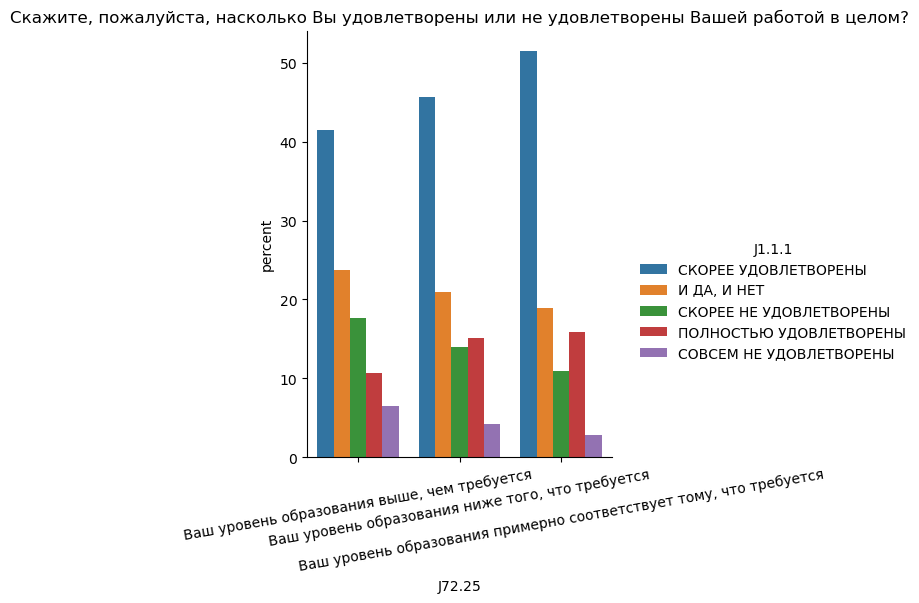

In [147]:
norm_bar_plot_filter_by('J1.1.1', 'J29', 'Нет')

Text(0.5, 0.98, 'Скажите, пожалуйста, насколько Вы удовлетворены или не удовлетворены Вашей работой в целом?')

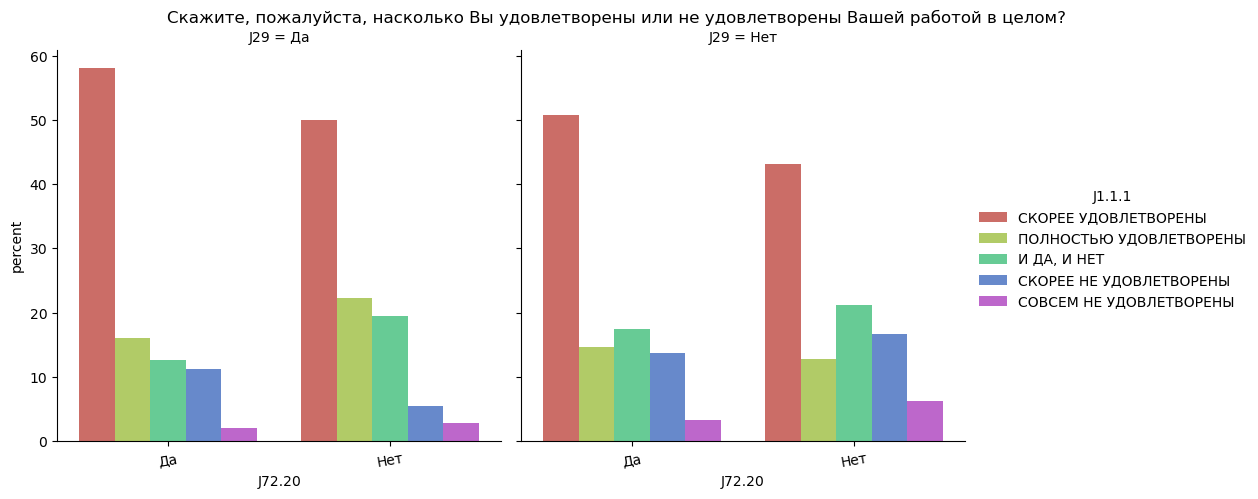

In [224]:
col = 'J29'
df_1 = dataframe[dataframe[col].notnull()]
df_1 = df_1[df_1[col]<=3]
df_1[col]=df_1[col].map(meta.variable_value_labels[col])
#df_1=df_1[df_1[col]=='Нет']
col='J1.1.1'
df_1 = df_1[df_1[col].notnull()]
df_1 = df_1[df_1[col]<=10]
df_1 = df_1[df_1['J72.20']<=10]
df_1['J72.20']=df_1['J72.20'].map(meta.variable_value_labels['J72.20'])
df_1[col]=df_1[col].map(meta.variable_value_labels[col])
# sns.countplot(data=df_1[df_1['AGE']<100], y=col, hue='J72.25')
x='J72.20'
y=col
data = (df_1
.groupby([x, 'J29'])[[y, 'J29']]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
       )

#((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar')

p = sns.catplot(x=x, y="percent", hue=y, data=data, kind='bar', col='J29', palette='hls')#.set(title = meta.column_names_to_labels[col])
#_ = plt.setp(p.get_xticklabels(), rotation=90)  # Rotate labels
p.set_xticklabels(rotation=10)
p.fig.subplots_adjust(top=0.9)
p.fig.suptitle(meta.column_names_to_labels[col])

#g = sns.FacetGrid(data, col='J29', hue = 'J1.1.1')
#g.map(sns.catplot, x, 'percent', kind='bar')
#g.add_legend()

Среди работников занятых предпринимательской деятельностью уровень неудовлетворенности ниже.
Неудовлетворенность работой выше у тех, чей уровень образования выше, чем требуется 

Text(0.5, 0.98, 'Скажите, пожалуйста, насколько Вы удовлетворены или не удовлетворены Вашей работой в целом?')

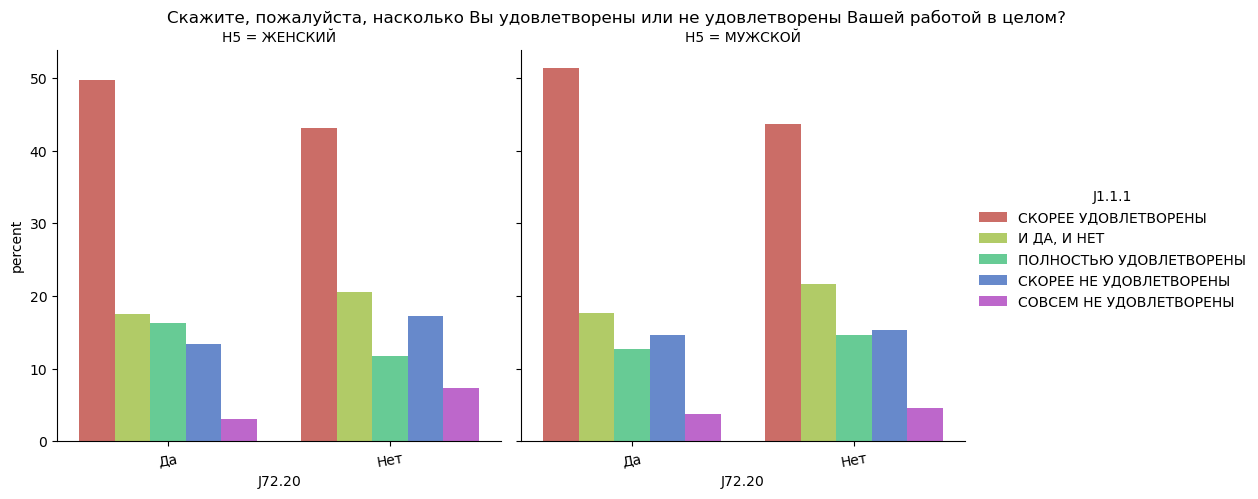

In [225]:
col = 'H5'
df_1 = dataframe[dataframe[col].notnull()]
df_1 = df_1[df_1[col]<=3]
df_1[col]=df_1[col].map(meta.variable_value_labels[col])
#df_1=df_1[df_1[col]=='Нет']
col='J1.1.1'
df_1 = df_1[df_1[col].notnull()]
df_1 = df_1[df_1[col]<=10]
df_1 = df_1[df_1['J72.20']<=10]
df_1['J72.20']=df_1['J72.20'].map(meta.variable_value_labels['J72.20'])
df_1[col]=df_1[col].map(meta.variable_value_labels[col])
# sns.countplot(data=df_1[df_1['AGE']<100], y=col, hue='J72.25')
x='J72.20'
y=col
data = (df_1
.groupby([x, 'H5'])[[y, 'H5']]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
       )

#((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar')

p = sns.catplot(x=x, y="percent", hue=y, data=data, kind='bar', col='H5', palette='hls')#.set(title = meta.column_names_to_labels[col])
#_ = plt.setp(p.get_xticklabels(), rotation=90)  # Rotate labels
p.set_xticklabels(rotation=10)
p.fig.subplots_adjust(top=0.9)
p.fig.suptitle(meta.column_names_to_labels[col])

In [5]:
def norm_bar_plots_by_col(col, col_by):
    df_1 = dataframe[dataframe[col_by].notnull()]
    df_1 = df_1[df_1[col_by]<=10]
    df_1[col_by]=df_1[col_by].map(meta.variable_value_labels[col_by])
    #df_1=df_1[df_1[col]=='Нет']
    df_1 = df_1[df_1[col].notnull()]
    df_1 = df_1[df_1[col]<=10]
    df_1 = df_1[df_1['J72.25']<=10]
    df_1['J72.25']=df_1['J72.25'].map(meta.variable_value_labels['J72.25'])
    df_1[col]=df_1[col].map(meta.variable_value_labels[col])
    # sns.countplot(data=df_1[df_1['AGE']<100], y=col, hue='J72.25')
    x='J72.25'
    y=col
    data = (df_1
    .groupby([x, col_by])[[y, col_by]]
    .value_counts(normalize=True)
    .mul(100)
    .rename('percent')
    .reset_index()
    )

    #((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar')

    p = sns.catplot(x=x, y="percent", hue=y, data=data, kind='bar', col=col_by, palette='hls')#.set(title = meta.column_names_to_labels[col])
    #_ = plt.setp(p.get_xticklabels(), rotation=90)  # Rotate labels
    p.set_xticklabels(rotation=10)
    p.fig.subplots_adjust(top=0.9)
    p.fig.suptitle(meta.column_names_to_labels[col])

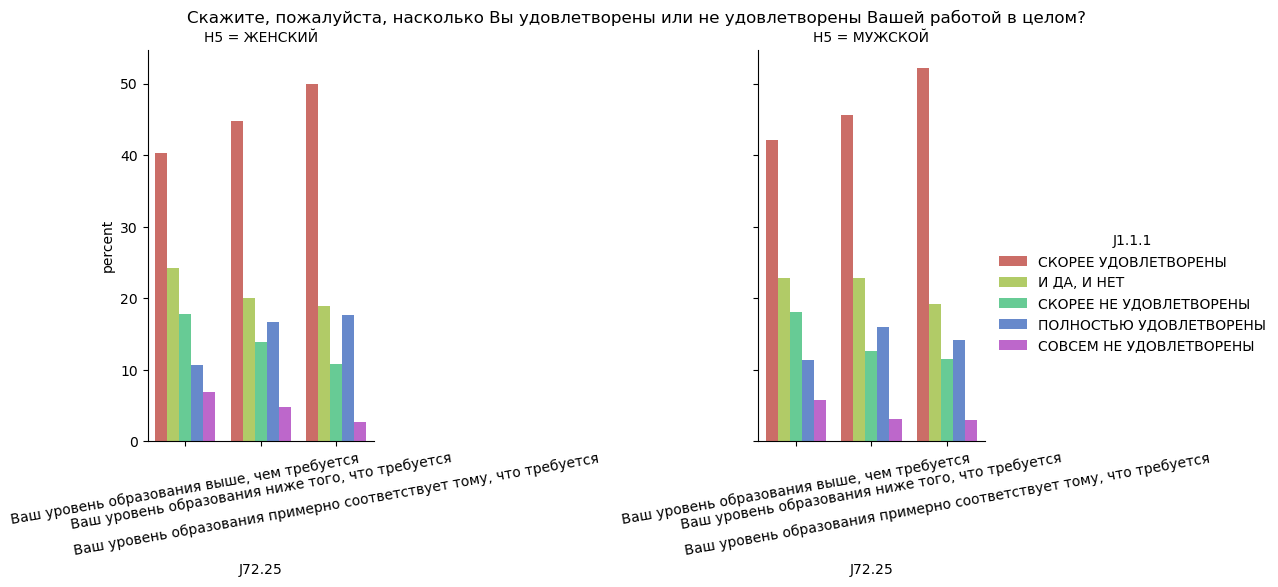

In [6]:
norm_bar_plots_by_col('J1.1.1', 'H5')

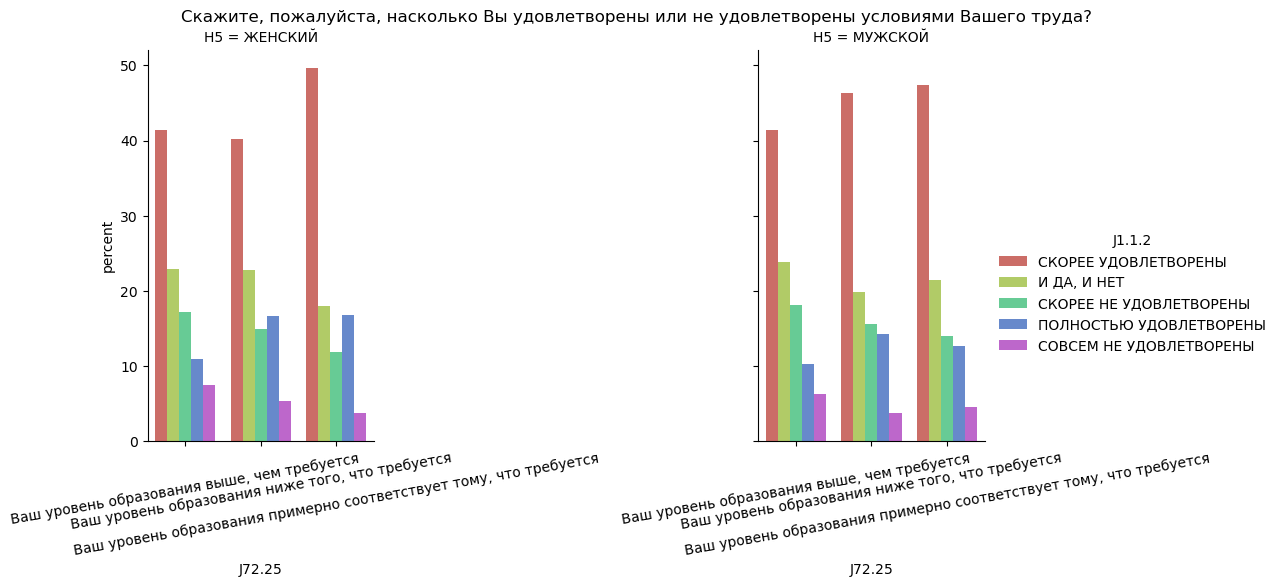

In [164]:
norm_bar_plots_by_col('J1.1.2', 'H5')

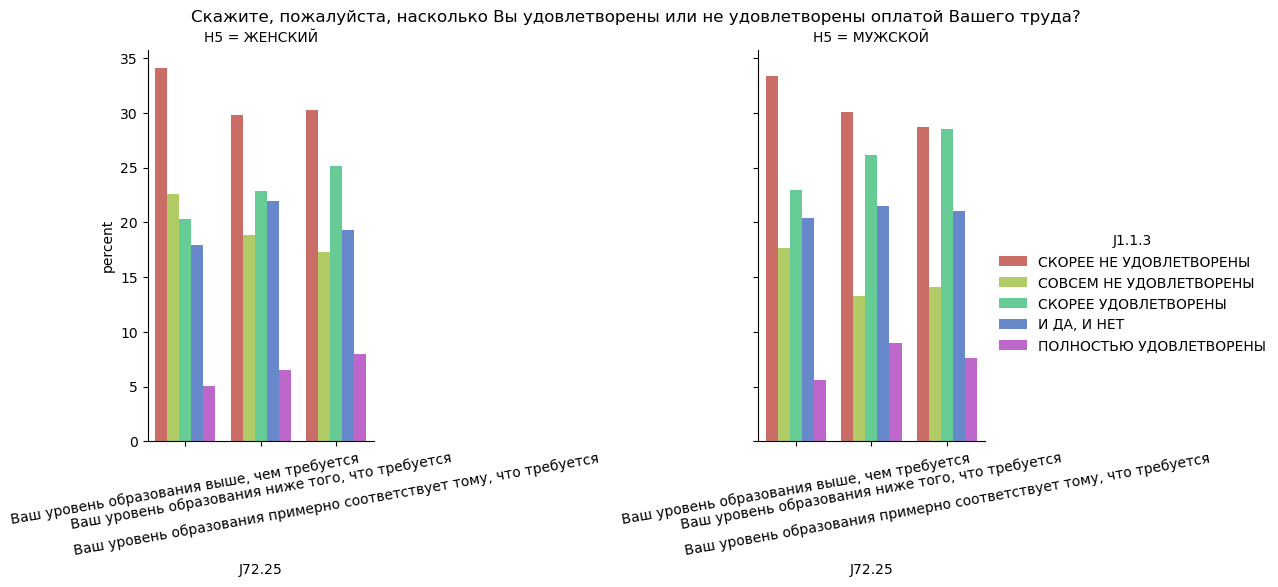

In [165]:
norm_bar_plots_by_col('J1.1.3', 'H5')

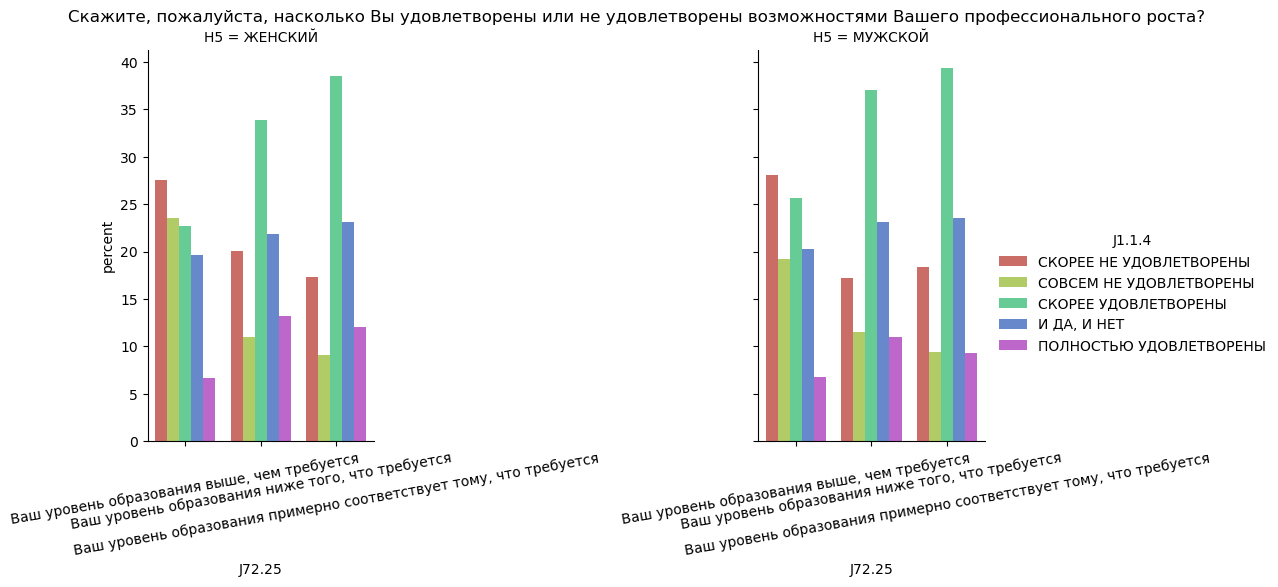

In [166]:
norm_bar_plots_by_col('J1.1.4', 'H5')

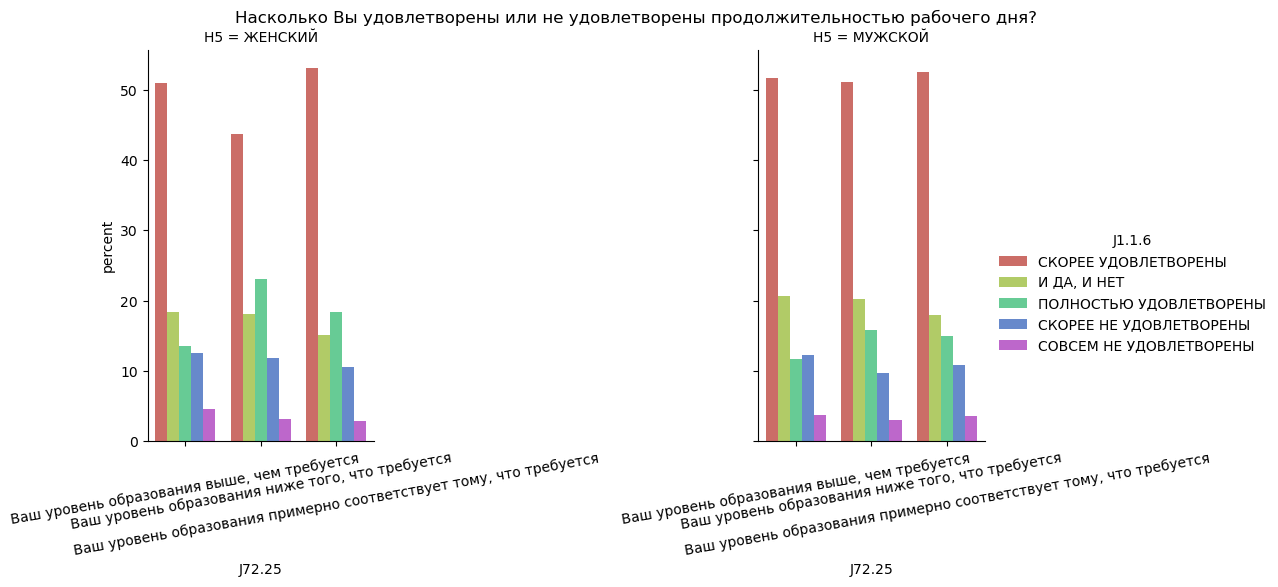

In [167]:
norm_bar_plots_by_col('J1.1.6', 'H5')

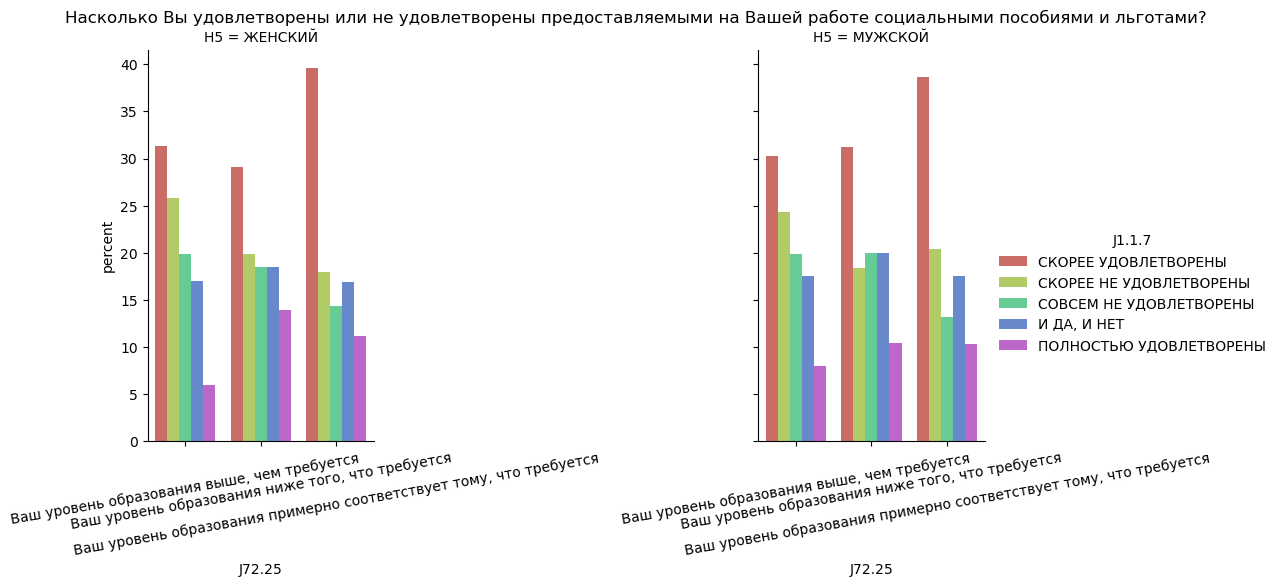

In [168]:
norm_bar_plots_by_col('J1.1.7', 'H5')

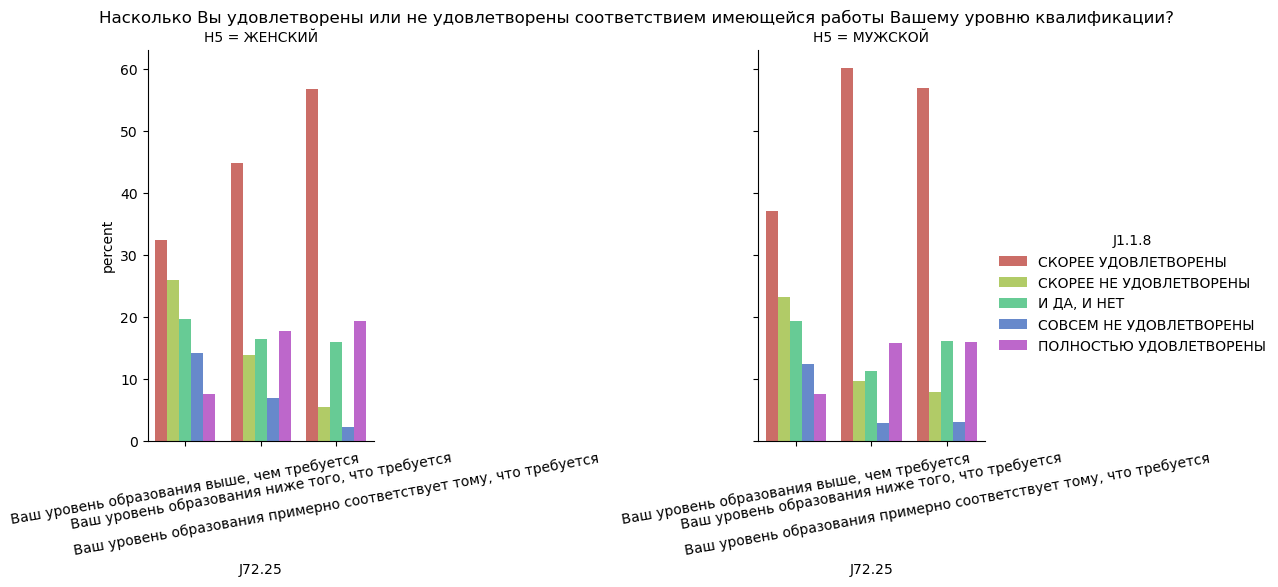

In [169]:
norm_bar_plots_by_col('J1.1.8', 'H5')

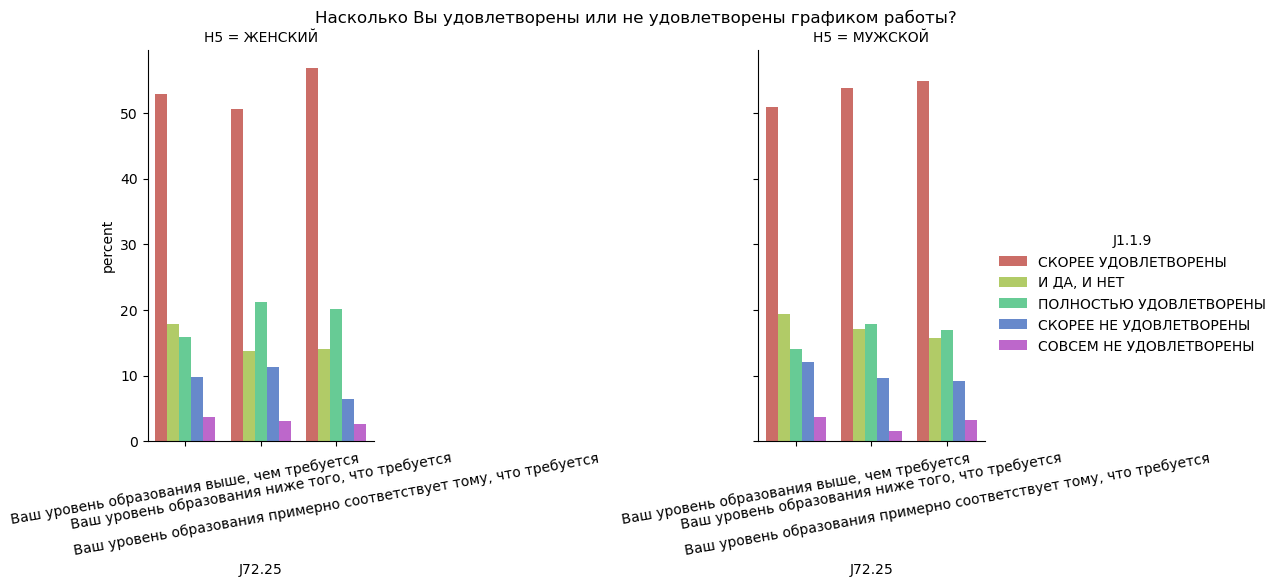

In [170]:
norm_bar_plots_by_col('J1.1.9', 'H5')

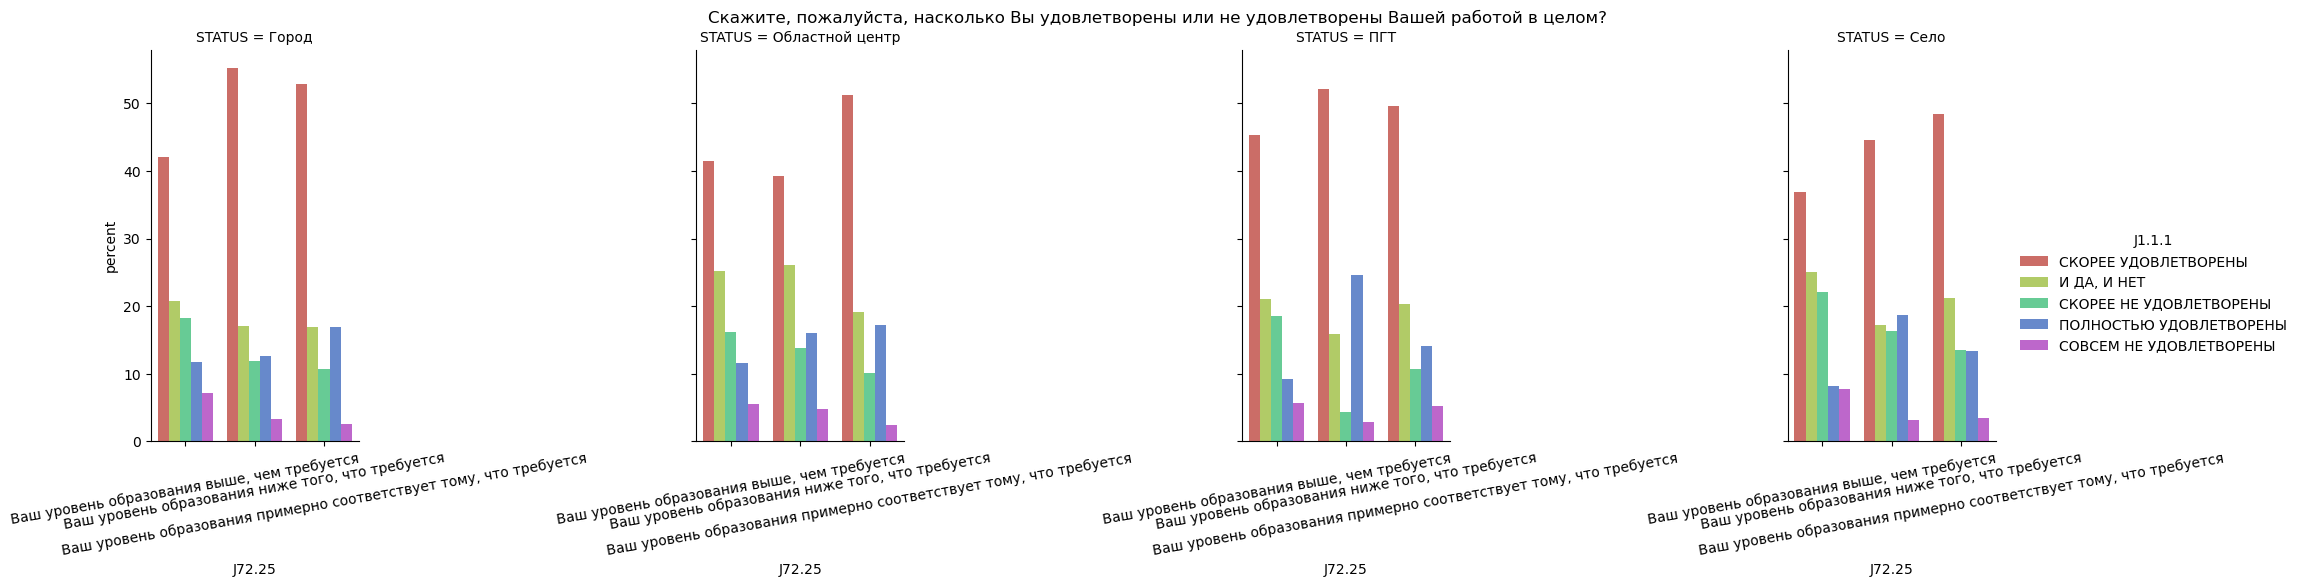

In [171]:
norm_bar_plots_by_col('J1.1.1', 'STATUS')

Text(0.5, 0.98, 'Скажите, пожалуйста, насколько Вы удовлетворены или не удовлетворены Вашей работой в целом?')

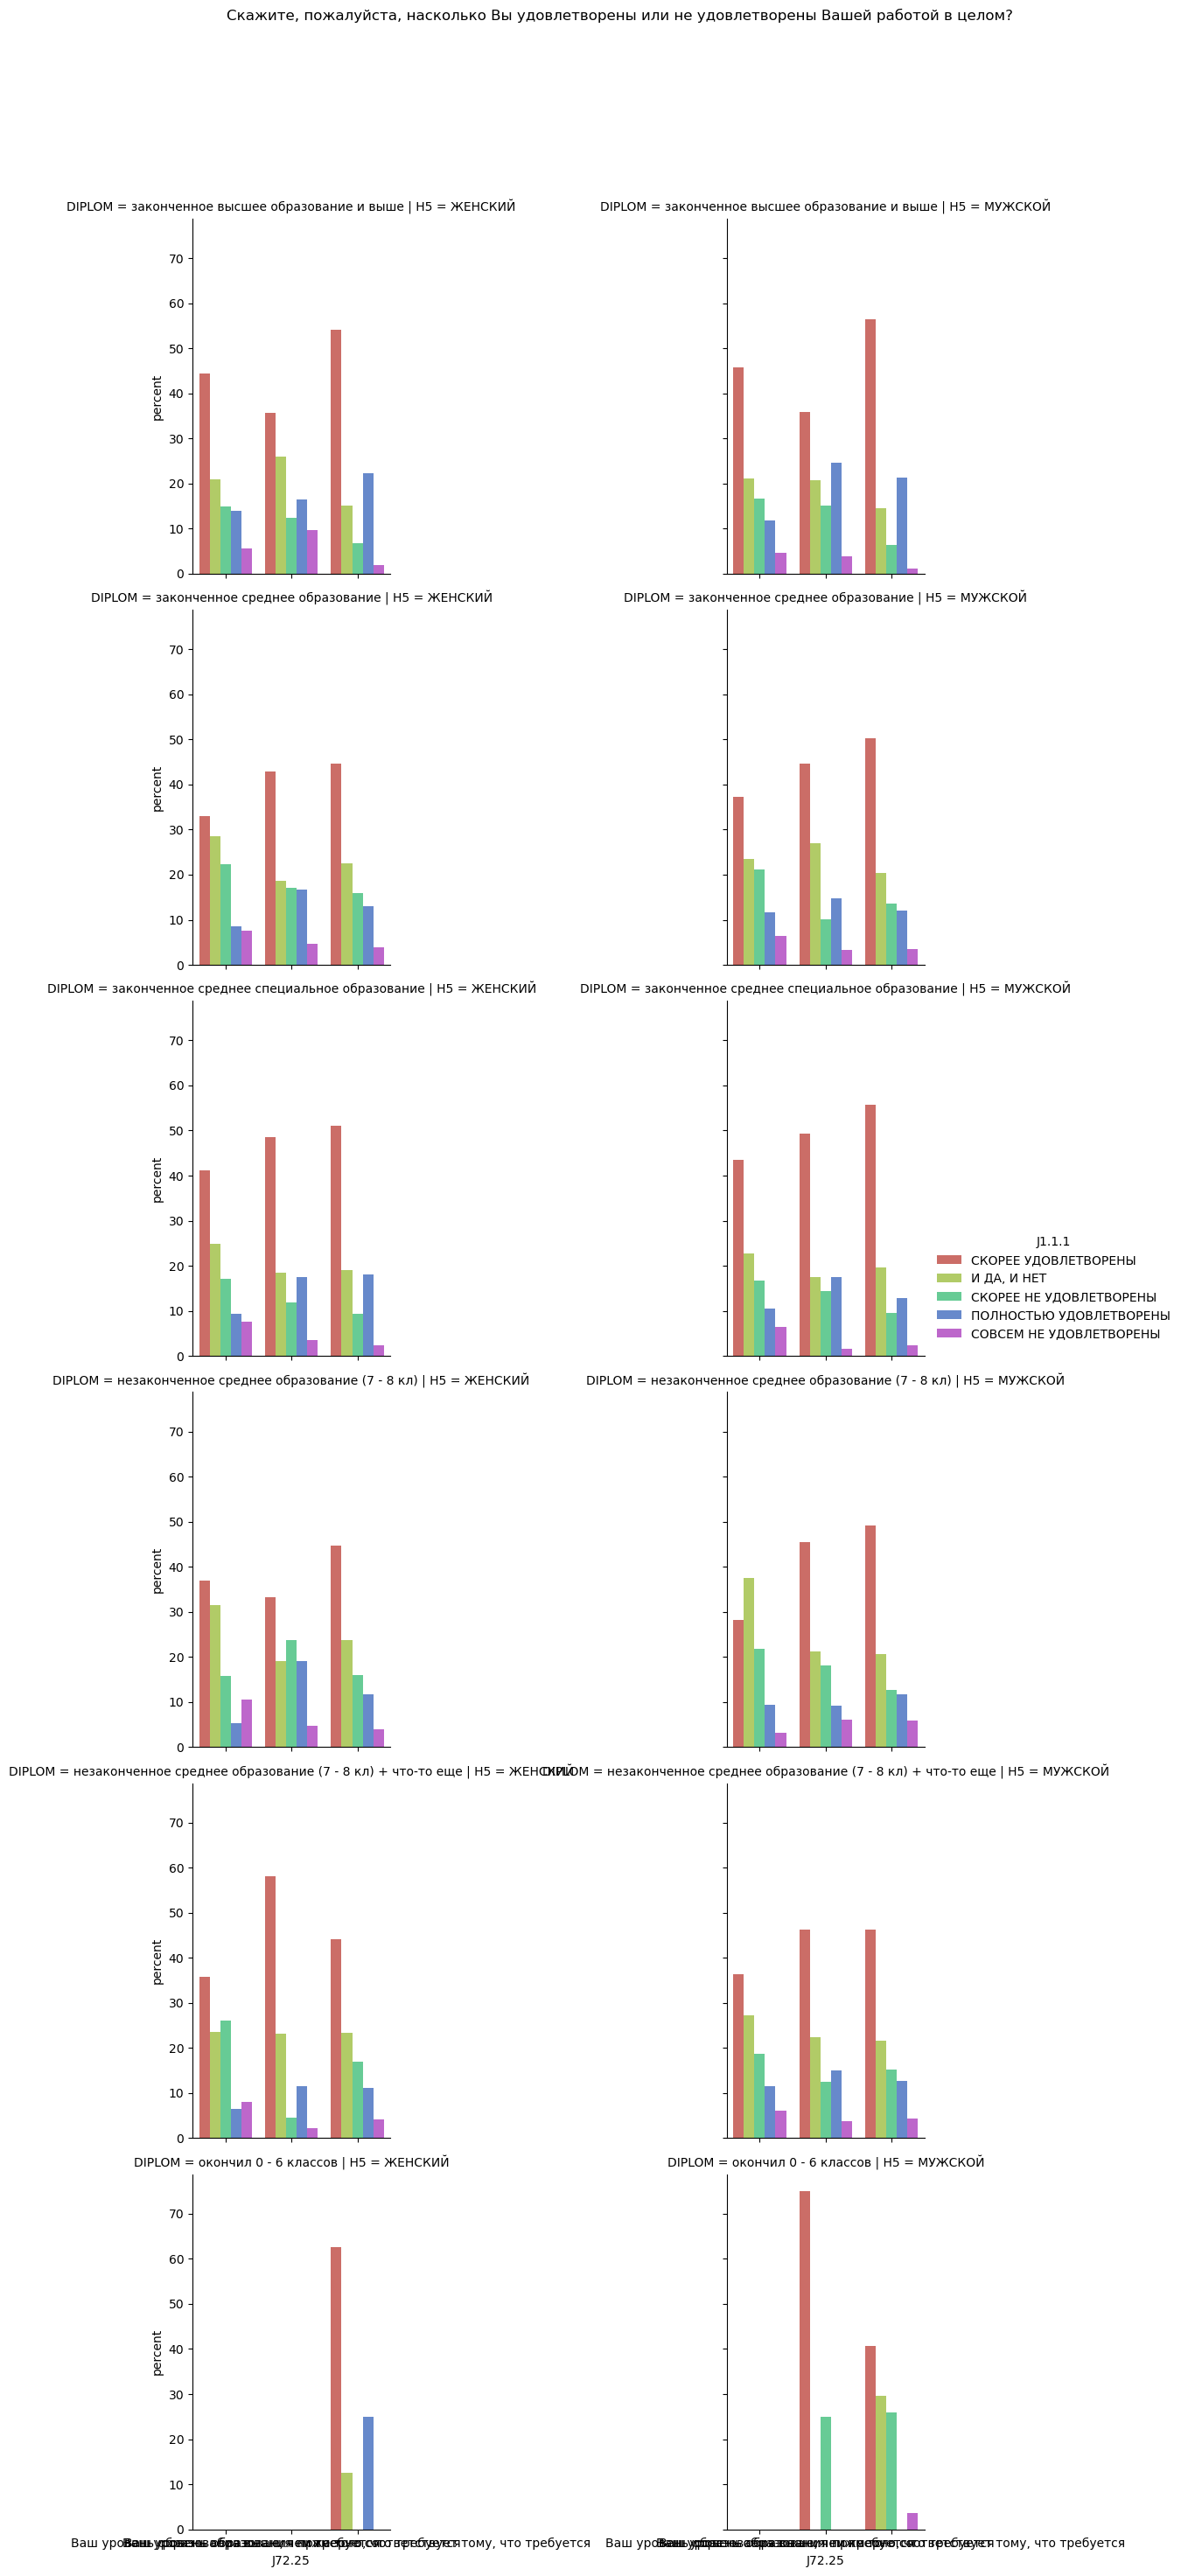

In [48]:
col = 'H5'
df_1 = dataframe[dataframe[col].notnull()]
df_1 = df_1[df_1[col]<=3]
df_1[col]=df_1[col].map(meta.variable_value_labels[col])
#df_1=df_1[df_1[col]=='Нет']
col='J1.1.1'
df_1 = df_1[df_1[col].notnull()]
df_1 = df_1[df_1[col]<=10]
df_1 = df_1[df_1['J72.25']<=10]
df_1['J72.25']=df_1['J72.25'].map(meta.variable_value_labels['J72.25'])
df_1[col]=df_1[col].map(meta.variable_value_labels[col])
# sns.countplot(data=df_1[df_1['AGE']<100], y=col, hue='J72.25')
df_1=df_1[df_1['DIPLOM'] < 100]
df_1['DIPLOM']=df_1['DIPLOM'].map(meta.variable_value_labels['DIPLOM'])
x='J72.25'
y=col
data = (df_1
.groupby([x, 'H5', 'DIPLOM'])[[y, 'H5', 'DIPLOM']]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
       )

#((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar')

p = sns.catplot(x=x, y="percent", hue=y, data=data, kind='bar', col='H5', palette='hls', row = 'DIPLOM')#.set(title = meta.column_names_to_labels[col])
#_ = plt.setp(p.get_xticklabels(), rotation=90)  # Rotate labels
#p.set_xticklabels(rotation=10)
p.fig.subplots_adjust(top=0.9)
p.fig.suptitle(meta.column_names_to_labels[col])

In [175]:
categ_features = [
    'STATUS', # ТИП НАСЕЛЕННОГО ПУНКТА
    'DIPLOM', # ОБРАЗОВАНИЕ
    'J29', # Как Вы считаете, на этой работе Вы занимаетесь предпринимательской деятельностью?
    'J1.1.1', # Скажите, пожалуйста, насколько Вы удовлетворены или не удовлетворены Вашей работой в целом?
    'J1.1.2', # Скажите, пожалуйста, насколько Вы удовлетворены или не удовлетворены условиями Вашего труда?
    'J1.1.3', # Скажите, пожалуйста, насколько Вы удовлетворены или не удовлетворены оплатой Вашего труда?
    'J1.1.4', # Скажите, пожалуйста, насколько Вы удовлетворены или не удовлетворены возможностями Вашего профессионального роста?
    'J1.1.6', # Насколько Вы удовлетворены или не удовлетворены продолжительностью рабочего дня?
    'J1.1.7', # Насколько Вы удовлетворены или не удовлетворены предоставляемыми на Вашей работе социальными пособиями и льготами?
    'J1.1.8', # Насколько Вы удовлетворены или не удовлетворены соответствием имеющейся работы Вашему уровню квалификации?
    'J1.1.9', # Насколько Вы удовлетворены или не удовлетворены графиком работы?
    'MARST', # СЕМЕЙНОЕ ПОЛОЖЕНИЕ В ТЕКУЩЕЙ ВОЛНЕ
    'J4.3', # В какой мере на Вашей основной работе используются Ваши знания и опыт?
    'J6', # У Вас есть подчиненные?
    'J11', # Скажите, пожалуйста, на этой работе Вы работаете на предприятии, в организации, в учреждении, колхозе, совхозе, на фирме?
    'J11.1', # Скажите, пожалуйста, Вы оформлены на этой работе официально, то есть по трудовой книжке, трудовому соглашению, контракту?
    'J23', # Является государство владельцем или совладельцем Вашего предприятия, организации?
    'J31', # Насколько Вас беспокоит то, что Вы можете потерять работу?
    'J60.5A', # Скажите, пожалуйста, как изменилось материальное положение Вашей семьи за последние 12 месяцев?
    'J65', # Насколько Вы удовлетворены своей жизнью в целом в настоящее время?
    'J66.1', # Скажите, пожалуйста, насколько Вы удовлетворены своим материальным положением в настоящее время?
    'J69.1', # Представьте себе «лестницу профессионального мастерства», состоящую из 9-ти ступеней, где 1-я ступень - это уровень начинающего, а 9-я - это уровень «профессионала высокого класса». На какую из них Вы поместили бы себя?
    'J69.3', # А такое высказывание - оно про Вас или не про Вас: "Мне кажется, что у меня мало таких качеств, которые ценятся в сегодняшней экономической ситуации"?
    'J72.161', # Приходилось ли Вам в течение последних 12 месяцев пользоваться персональным компьютером в любых целях?
    'J73', # Вы сейчас получаете пенсию?
    'J81', # Хотели бы Вы найти работу?
    'J72.20', # Вы сами работали по полученной или близкой к ней специальности после получения образования в учебном учреждении?
    'J72.21', # Вы работали по полученной или близкой к ней специальности все время или не все время?
    'J72.22', # Насколько полезными в Вашей последующей трудовой жизни оказались знания, полученные в учебном учреждении?
    'J72.17', # Каково Ваше семейное положение?
    'J79.1.1', # Для Вас лично при выборе работы насколько важны такие ее стороны, как возможность получать новые знания, умения?
    'J79.1.2', # Для Вас лично при выборе работы насколько важны такие ее стороны, как хорошая репутация предприятия, организации, фирмы?
    'J79.1.3', # Для Вас лично при выборе работы насколько важны такие ее стороны, как размер заработной платы?
    'J79.1.4', # Для Вас лично при выборе работы насколько важны такие ее стороны, как гарантированная работа, низкая вероятность ее потерять?
    'J79.1.5', # Для Вас лично при выборе работы насколько важны такие ее стороны, как удобный график работы?
    'J79.1.6', # Для Вас лично при выборе работы насколько важны такие ее стороны, как интересная, творческая работа?
    'J79.1.7', # Для Вас лично при выборе работы насколько важны такие ее стороны, как удобное расположение предприятия, организации, фирмы?
    'J79.1.9', # Для Вас лично при выборе работы насколько важны такие ее стороны, как соответствие работы Вашим способностям, склонностям?
    'J791.10', # Для Вас лично при выборе работы насколько важны такие ее стороны, как хорошие отношения в коллективе?
    'J791.11', # Для Вас лично при выборе работы насколько важны такие ее стороны, как хорошее социальное обеспечение - путевки, дополнительное медицинское обслуживание, питание и т.п.?
    'J791.12', # Для Вас лично при выборе работы насколько важны такие ее стороны, как возможности должностного роста?
    'J791.13', # Для Вас лично при выборе работы насколько важны такие ее стороны, как условия труда?
    'J337', # Вас устраивает количество времени, которое Вы тратите на зарабатывание денег?
    'J338', # Вы готовы, если будет возможность, больше работать, чтобы увеличить Ваш доход от работы? То есть больше работать на этой работе или найти дополнительную работу или сменить Вашу работу на другую, которая отнимает больше времени, но приносит больший доход?
    'M3' # Скажите, пожалуйста, как Вы оцениваете Ваше здоровье?
]

In [176]:
numeric_features = [
    'J13.2', # За последние 12 месяцев какова была Ваша среднемесячная зарплата на этом предприятии после вычета налогов - независимо от того, платят Вам ее вовремя или нет?
    'AGE', # Количество полных лет
    'J72.21Y', # Сколько лет Вы работали по полученной или близкой к ней специальности?
    'J72.1B' # Cколько лет Вы проучились на профессиональных курсах?
]

In [177]:
target = 'J72.25'

In [178]:
df_1 = dataframe[
    (dataframe['J72.25'].notnull())
    & (dataframe['AGE'] > 18) 
    & (dataframe['AGE'] < 65)
]
for cat_f in categ_features:
    if cat_f in ('age_cat', 'H5'):
        continue
    #df_1 = df_1[df_1[cat_f] < 100]
    df_1[cat_f] = df_1[cat_f].map(lambda x: 100 if x > 100 else x)

df_1 = df_1[df_1[target] < 100]

C:\Users\Alexkeks\AppData\Local\Temp\ipykernel_21360\912031723.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1[cat_f] = df_1[cat_f].map(lambda x: 100 if x > 100 else x)


In [238]:
import numpy as np
df_1['age_cat'] = np.select(
    [
        df_1['AGE'].between(18, 24, inclusive='both'),
        df_1['AGE'].between(25, 34, inclusive='both'),
        df_1['AGE'].between(35, 44, inclusive='both'),
        df_1['AGE'].between(45, 54, inclusive='both'),
        df_1['AGE'].between(55, 64, inclusive='both')
    ],
    [
        '18-24',
        '25-34',
        '35-44',
        '45-54',
        '55-64'
    ],
    default='Unknown'
)

In [180]:
df_pool = df_1[categ_features + numeric_features + [target] + ['H5']]

In [181]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

In [182]:
df_pool = df_pool[df_pool['J13.2'] < 150000] # выбросим странные значения зарплаты
numeric_preprocessing = Pipeline(
[
     ('Imputation', SimpleImputer(missing_values=np.nan, strategy='mean')),
     ('Scaling', StandardScaler())
]
)

my_transformer = make_column_transformer(
    (OneHotEncoder(handle_unknown='ignore', sparse=False), categ_features),
    (numeric_preprocessing, numeric_features),
    remainder='passthrough'
)

#df_pool_t = my_transformer.fit_transform(df_pool)

df_pool_t = pd.DataFrame(
    my_transformer.fit_transform(df_pool),
    columns=my_transformer.get_feature_names_out()
)

C:\Users\Alexkeks\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [183]:
df_pool_t

,onehotencoder__STATUS_1.0,onehotencoder__STATUS_2.0,onehotencoder__STATUS_3.0,onehotencoder__STATUS_4.0,onehotencoder__DIPLOM_1.0,onehotencoder__DIPLOM_2.0,onehotencoder__DIPLOM_3.0,onehotencoder__DIPLOM_4.0,onehotencoder__DIPLOM_5.0,onehotencoder__DIPLOM_6.0,...,onehotencoder__M3_3.0,onehotencoder__M3_4.0,onehotencoder__M3_5.0,onehotencoder__M3_100.0,pipeline__J13.2,pipeline__AGE,pipeline__J72.21Y,pipeline__J72.1B,remainder__J72.25,remainder__H5
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.131787,-1.285455,3.963954e-16,-2.842438e-17,2.0,2.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,-0.905114,1.943384,-9.734620e-01,-2.842438e-17,1.0,2.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.603106,1.433567,3.963954e-16,-1.818300e-01,2.0,2.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-0.292399,-1.540364,3.963954e-16,-2.842438e-17,2.0,2.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.603106,1.178659,-9.734665e-01,-2.842438e-17,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18930,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.131787,-1.115516,3.963954e-16,-2.842438e-17,2.0,2.0
18931,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.074424,-0.945577,3.963954e-16,-2.842438e-17,2.0,1.0
18932,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,-0.528059,-0.180852,3.963954e-16,-2.842438e-17,2.0,2.0
18933,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,-0.810850,-1.710303,3.963954e-16,-2.842438e-17,1.0,2.0


In [184]:
from sklearn.model_selection import train_test_split

In [185]:
X = df_pool_t.loc[:, df_pool_t.columns != 'remainder__' + target]
y = df_pool_t['remainder__' + target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state = 42)

In [186]:
X_train.shape

(17041, 264)

In [187]:
X.shape

(18935, 264)

In [188]:
X_test.shape

(1894, 264)

In [189]:
from sklearn.linear_model import LogisticRegression

In [190]:
logreg = LogisticRegression(C = 1.0, random_state = 42, multi_class = 'multinomial', max_iter=5000)

In [191]:
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=5000, multi_class='multinomial', random_state=42)

In [192]:
logreg.coef_.shape

(3, 264)

In [193]:
logreg.score(X_test, y_test)

0.7872228088701162

In [194]:
from sklearn.metrics import confusion_matrix, classification_report

In [196]:
y_pred = logreg.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 199  258    1]
 [  70 1292    0]
 [  12   62    0]]
              precision    recall  f1-score   support

         1.0       0.71      0.43      0.54       458
         2.0       0.80      0.95      0.87      1362
         3.0       0.00      0.00      0.00        74

    accuracy                           0.79      1894
   macro avg       0.50      0.46      0.47      1894
weighted avg       0.75      0.79      0.76      1894



In [197]:
from sklearn.decomposition import PCA

In [198]:
pca = PCA()
pca.fit(X)
pca.transform(X)

array([[-1.58810073e+00,  5.74271346e-01,  2.35619567e+00, ...,
         3.80656409e-18, -1.80411242e-16,  2.08166817e-16],
       [-1.58087030e+00, -2.76420646e+00,  1.21245583e+00, ...,
        -4.20533965e-17,  3.60822483e-16,  2.77555756e-17],
       [-1.56472974e+00, -8.73359065e-01,  1.38202188e+00, ...,
         3.54396467e-18, -1.24900090e-16, -2.35922393e-16],
       ...,
       [-1.41653634e+00, -5.68724003e-01, -1.30164007e+00, ...,
        -1.24919275e-18,  4.42354486e-16,  2.68882139e-17],
       [-1.40896929e+00,  5.76665321e-01, -9.60793126e-01, ...,
         4.35600636e-17,  7.89299182e-17,  4.98732999e-16],
       [-1.42330444e+00, -1.17369289e+00, -1.53493248e+00, ...,
         2.96802573e-18,  2.69749501e-16,  4.53630189e-16]])

In [199]:
pca.explained_variance_ratio_

array([2.02800220e-01, 5.45454314e-02, 4.64150913e-02, 4.49740593e-02,
       3.78661470e-02, 3.73791615e-02, 2.89655916e-02, 2.47844475e-02,
       2.04215218e-02, 1.78751329e-02, 1.53357463e-02, 1.51845151e-02,
       1.41721443e-02, 1.35999801e-02, 1.32102767e-02, 1.30541077e-02,
       1.21113969e-02, 1.19766789e-02, 1.12533927e-02, 1.06131070e-02,
       1.04261202e-02, 1.01750808e-02, 9.74597864e-03, 9.25434831e-03,
       8.50181413e-03, 8.29456817e-03, 8.02981380e-03, 7.54589174e-03,
       7.15830597e-03, 7.14651387e-03, 6.95359046e-03, 6.79416333e-03,
       6.59940540e-03, 6.46224534e-03, 6.29117665e-03, 6.04689817e-03,
       5.94962811e-03, 5.85369208e-03, 5.72063824e-03, 5.49341281e-03,
       5.40189390e-03, 5.23922788e-03, 4.99701161e-03, 4.97416546e-03,
       4.77988475e-03, 4.46861486e-03, 4.42363345e-03, 4.28411342e-03,
       4.09634408e-03, 4.02298536e-03, 3.90245745e-03, 3.79961358e-03,
       3.76233984e-03, 3.66645353e-03, 3.42124994e-03, 3.33364065e-03,
      

In [200]:
pca = PCA(n_components=2)
pca.fit(X)
pca.transform(X)

array([[-1.58810073,  0.57415351],
       [-1.5808703 , -2.76421854],
       [-1.56472974, -0.8733355 ],
       ...,
       [-1.41653634, -0.56867341],
       [-1.40896929,  0.57657721],
       [-1.42330444, -1.17366093]])

<Axes: xlabel='PC1', ylabel='PC2'>

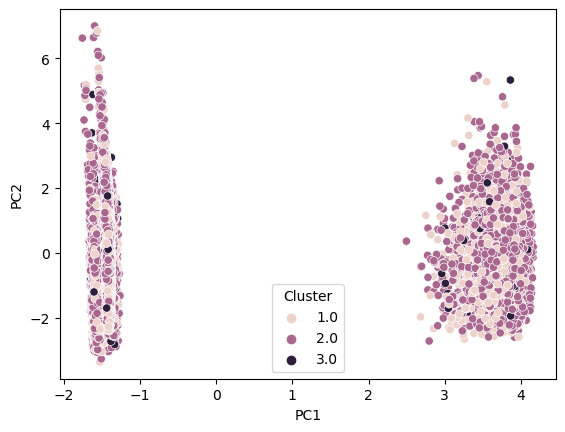

In [201]:
pc_df = pd.DataFrame(data = pca.transform(X), 
        columns = ['PC1', 'PC2'])
pc_df['Cluster'] = y
sns.scatterplot(data=pc_df, 
                x="PC1", 
                y="PC2", 
                hue="Cluster")

C:\Users\Alexkeks\AppData\Local\Temp\ipykernel_21360\1514561183.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1[cat_f] = df_1[cat_f].map(lambda x: 100 if x > 100 else x)
C:\Users\Alexkeks\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


0.8305084745762712
[[338  16]
 [ 64  54]]
              precision    recall  f1-score   support

         1.0       0.84      0.95      0.89       354
         2.0       0.77      0.46      0.57       118

    accuracy                           0.83       472
   macro avg       0.81      0.71      0.73       472
weighted avg       0.82      0.83      0.81       472



<Axes: xlabel='PC1', ylabel='PC2'>

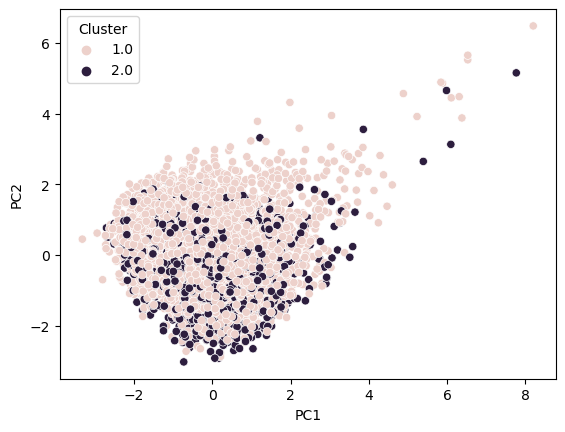

In [257]:
categ_features = [
    'STATUS', # ТИП НАСЕЛЕННОГО ПУНКТА
    'DIPLOM', # ОБРАЗОВАНИЕ
    'J29', # Как Вы считаете, на этой работе Вы занимаетесь предпринимательской деятельностью?
    'J1.1.1', # Скажите, пожалуйста, насколько Вы удовлетворены или не удовлетворены Вашей работой в целом?
    'J1.1.2', # Скажите, пожалуйста, насколько Вы удовлетворены или не удовлетворены условиями Вашего труда?
    'J1.1.3', # Скажите, пожалуйста, насколько Вы удовлетворены или не удовлетворены оплатой Вашего труда?
    'J1.1.4', # Скажите, пожалуйста, насколько Вы удовлетворены или не удовлетворены возможностями Вашего профессионального роста?
    'J1.1.6', # Насколько Вы удовлетворены или не удовлетворены продолжительностью рабочего дня?
    'J1.1.7', # Насколько Вы удовлетворены или не удовлетворены предоставляемыми на Вашей работе социальными пособиями и льготами?
    'J1.1.8', # Насколько Вы удовлетворены или не удовлетворены соответствием имеющейся работы Вашему уровню квалификации?
    'J1.1.9', # Насколько Вы удовлетворены или не удовлетворены графиком работы?
    'MARST', # СЕМЕЙНОЕ ПОЛОЖЕНИЕ В ТЕКУЩЕЙ ВОЛНЕ
    'J4.3', # В какой мере на Вашей основной работе используются Ваши знания и опыт?
    'J6', # У Вас есть подчиненные?
    'J11', # Скажите, пожалуйста, на этой работе Вы работаете на предприятии, в организации, в учреждении, колхозе, совхозе, на фирме?
    'J11.1', # Скажите, пожалуйста, Вы оформлены на этой работе официально, то есть по трудовой книжке, трудовому соглашению, контракту?
    'J23', # Является государство владельцем или совладельцем Вашего предприятия, организации?
    'J31', # Насколько Вас беспокоит то, что Вы можете потерять работу?
    'J60.5A', # Скажите, пожалуйста, как изменилось материальное положение Вашей семьи за последние 12 месяцев?
    'J65', # Насколько Вы удовлетворены своей жизнью в целом в настоящее время?
    'J66.1', # Скажите, пожалуйста, насколько Вы удовлетворены своим материальным положением в настоящее время?
    'J69.1', # Представьте себе «лестницу профессионального мастерства», состоящую из 9-ти ступеней, где 1-я ступень - это уровень начинающего, а 9-я - это уровень «профессионала высокого класса». На какую из них Вы поместили бы себя?
    'J69.3', # А такое высказывание - оно про Вас или не про Вас: "Мне кажется, что у меня мало таких качеств, которые ценятся в сегодняшней экономической ситуации"?
    'J72.161', # Приходилось ли Вам в течение последних 12 месяцев пользоваться персональным компьютером в любых целях?
    'J73', # Вы сейчас получаете пенсию?
    'J81', # Хотели бы Вы найти работу?
    #'J72.20', # Вы сами работали по полученной или близкой к ней специальности после получения образования в учебном учреждении?
    #'J72.21', # Вы работали по полученной или близкой к ней специальности все время или не все время?
    'J72.22', # Насколько полезными в Вашей последующей трудовой жизни оказались знания, полученные в учебном учреждении?
    'J72.17', # Каково Ваше семейное положение?
    'J79.1.1', # Для Вас лично при выборе работы насколько важны такие ее стороны, как возможность получать новые знания, умения?
    'J79.1.2', # Для Вас лично при выборе работы насколько важны такие ее стороны, как хорошая репутация предприятия, организации, фирмы?
    'J79.1.3', # Для Вас лично при выборе работы насколько важны такие ее стороны, как размер заработной платы?
    'J79.1.4', # Для Вас лично при выборе работы насколько важны такие ее стороны, как гарантированная работа, низкая вероятность ее потерять?
    'J79.1.5', # Для Вас лично при выборе работы насколько важны такие ее стороны, как удобный график работы?
    'J79.1.6', # Для Вас лично при выборе работы насколько важны такие ее стороны, как интересная, творческая работа?
    'J79.1.7', # Для Вас лично при выборе работы насколько важны такие ее стороны, как удобное расположение предприятия, организации, фирмы?
    'J79.1.9', # Для Вас лично при выборе работы насколько важны такие ее стороны, как соответствие работы Вашим способностям, склонностям?
    'J791.10', # Для Вас лично при выборе работы насколько важны такие ее стороны, как хорошие отношения в коллективе?
    'J791.11', # Для Вас лично при выборе работы насколько важны такие ее стороны, как хорошее социальное обеспечение - путевки, дополнительное медицинское обслуживание, питание и т.п.?
    'J791.12', # Для Вас лично при выборе работы насколько важны такие ее стороны, как возможности должностного роста?
    'J791.13', # Для Вас лично при выборе работы насколько важны такие ее стороны, как условия труда?
    'J337', # Вас устраивает количество времени, которое Вы тратите на зарабатывание денег?
    'J338', # Вы готовы, если будет возможность, больше работать, чтобы увеличить Ваш доход от работы? То есть больше работать на этой работе или найти дополнительную работу или сменить Вашу работу на другую, которая отнимает больше времени, но приносит больший доход?
    'M3', # Скажите, пожалуйста, как Вы оцениваете Ваше здоровье?
    'J72.25'
]

target = 'J72.20'

df_1 = dataframe[
    (dataframe[target].notnull())
    & (dataframe['AGE'] > 18) 
    & (dataframe['AGE'] < 65)
]
for cat_f in categ_features:
    if cat_f in ('age_cat', 'H5'):
        continue
    #df_1 = df_1[df_1[cat_f] < 100]
    df_1[cat_f] = df_1[cat_f].map(lambda x: 100 if x > 100 else x)

df_1 = df_1[df_1[target] < 100]


df_1['age_cat'] = np.select(
    [
        df_1['AGE'].between(18, 24, inclusive='both'),
        df_1['AGE'].between(25, 34, inclusive='both'),
        df_1['AGE'].between(35, 44, inclusive='both'),
        df_1['AGE'].between(45, 54, inclusive='both'),
        df_1['AGE'].between(55, 64, inclusive='both')
    ],
    [
        '18-24',
        '25-34',
        '35-44',
        '45-54',
        '55-64'
    ],
    default='Unknown'
)


df_pool = df_1[categ_features + numeric_features + [target] + ['H5']]



df_pool = df_pool[df_pool['J13.2'] < 150000] # выбросим странные значения зарплаты
numeric_preprocessing = Pipeline(
[
     ('Imputation', SimpleImputer(missing_values=np.nan, strategy='mean')),
     ('Scaling', StandardScaler())
]
)

my_transformer = make_column_transformer(
    (OneHotEncoder(handle_unknown='ignore', sparse=False), categ_features),
    (numeric_preprocessing, numeric_features),
    remainder='passthrough'
)

df_pool_t = pd.DataFrame(
    my_transformer.fit_transform(df_pool),
    columns=my_transformer.get_feature_names_out()
)

X = df_pool_t.loc[:, df_pool_t.columns != 'remainder__' + target]
y = df_pool_t['remainder__' + target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state = 42)
logreg = LogisticRegression(C = 1.0, random_state = 42, multi_class = 'multinomial', max_iter=5000)
logreg.fit(X_train, y_train)
print(logreg.score(X_test, y_test))
y_pred = logreg.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

pca = PCA(n_components=2)
pca.fit(X)
pca.transform(X)


pc_df = pd.DataFrame(data = pca.transform(X), 
        columns = ['PC1', 'PC2'])
pc_df['Cluster'] = y
sns.scatterplot(data=pc_df, 
                x="PC1", 
                y="PC2", 
                hue="Cluster")

2.0    15928
1.0     5777
3.0     1083
Name: J72.25, dtype: int64
Ваш уровень образования примерно соответствует тому, что требуется    15928
Ваш уровень образования выше, чем требуется                            5777
Ваш уровень образования ниже того, что требуется                       1083
Name: J72.25, dtype: int64


C:\Users\Alexkeks\AppData\Local\Temp\ipykernel_21360\2652901245.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['J72.25']=df_1['J72.25'].map(meta.variable_value_labels['J72.25'])


In [243]:
df_2005 = dataframe[(dataframe['YEAR'] == 2005) & (dataframe['M139'].notnull())][['YEAR', 'ID_I', 'M139']]
df_2 = df_1[categ_features + numeric_features + [target] + ['H5', 'ID_I'] ]
df_3 = df_2.merge(df_2005, on='ID_I', how='left')
df_3['age_cat'] = np.select(
    [
        df_3['AGE'].between(18, 24, inclusive='both'),
        df_3['AGE'].between(25, 34, inclusive='both'),
        df_3['AGE'].between(35, 44, inclusive='both'),
        df_3['AGE'].between(45, 54, inclusive='both'),
        df_3['AGE'].between(55, 64, inclusive='both')
    ],
    [
        '18-24',
        '25-34',
        '35-44',
        '45-54',
        '55-64'
    ],
    default='Unknown'
)
df_3

,STATUS,DIPLOM,J29,J1.1.1,J1.1.2,J1.1.3,J1.1.4,J1.1.6,J1.1.7,J1.1.8,...,J13.2,AGE,J72.21Y,J72.1B,J72.20,H5,ID_I,YEAR,M139,age_cat
0,3.0,4.0,2.0,СКОРЕЕ УДОВЛЕТВОРЕНЫ,2.0,3.0,3.0,NaN,NaN,NaN,...,15000.0,24.0,NaN,NaN,Да,ЖЕНСКИЙ,1.010020e+07,2005.0,1.0,18-24
1,3.0,5.0,2.0,"И ДА, И НЕТ",3.0,4.0,5.0,NaN,NaN,NaN,...,4000.0,62.0,35.0,NaN,Да,ЖЕНСКИЙ,1.010050e+07,2005.0,1.0,55-64
2,3.0,6.0,2.0,ПОЛНОСТЬЮ УДОВЛЕТВОРЕНЫ,1.0,3.0,2.0,NaN,NaN,NaN,...,20000.0,56.0,NaN,0.0,Да,ЖЕНСКИЙ,1.010070e+07,2005.0,1.0,55-64
3,3.0,4.0,NaN,ПОЛНОСТЬЮ УДОВЛЕТВОРЕНЫ,4.0,1.0,2.0,NaN,NaN,NaN,...,NaN,48.0,NaN,NaN,Да,ЖЕНСКИЙ,1.010120e+07,2005.0,2.0,45-54
4,3.0,4.0,2.0,ПОЛНОСТЬЮ УДОВЛЕТВОРЕНЫ,2.0,2.0,99999997.0,NaN,NaN,NaN,...,20000.0,53.0,3.0,NaN,Да,ЖЕНСКИЙ,1.010510e+07,NaN,NaN,45-54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5521,1.0,5.0,2.0,СКОРЕЕ УДОВЛЕТВОРЕНЫ,2.0,3.0,4.0,NaN,NaN,NaN,...,25000.0,59.0,NaN,NaN,Да,МУЖСКОЙ,2.411624e+09,NaN,NaN,55-64
5522,1.0,6.0,2.0,СКОРЕЕ УДОВЛЕТВОРЕНЫ,2.0,5.0,3.0,NaN,NaN,NaN,...,4000.0,56.0,3.0,NaN,Да,ЖЕНСКИЙ,2.411624e+09,NaN,NaN,55-64
5523,1.0,6.0,2.0,СКОРЕЕ УДОВЛЕТВОРЕНЫ,2.0,2.0,2.0,NaN,NaN,NaN,...,40000.0,25.0,NaN,NaN,Да,МУЖСКОЙ,2.411625e+09,NaN,NaN,25-34
5524,1.0,6.0,2.0,ПОЛНОСТЬЮ УДОВЛЕТВОРЕНЫ,2.0,2.0,2.0,NaN,NaN,NaN,...,40000.0,27.0,NaN,NaN,Да,ЖЕНСКИЙ,2.411625e+09,NaN,NaN,25-34


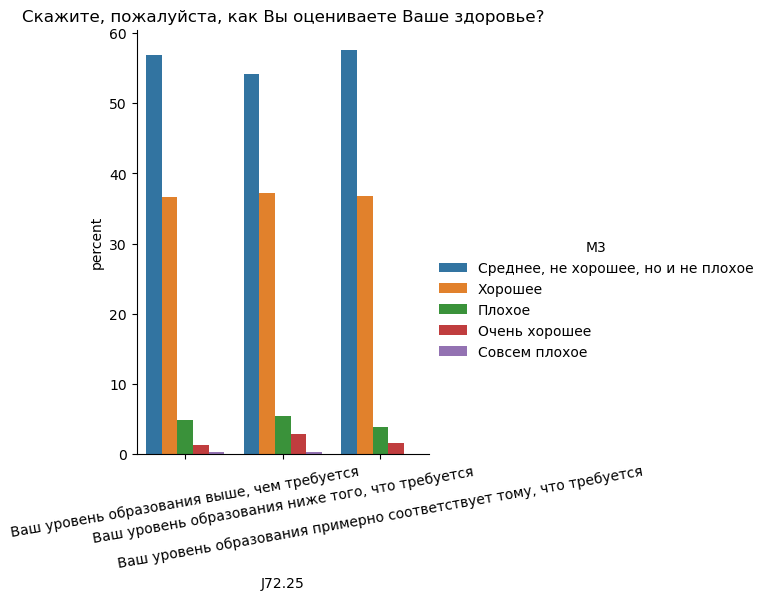

In [234]:
col='M3'
df_4 = df_3[df_3[col].notnull()]
df_4 = df_4[df_4[col]<=10]
df_4 = df_4[df_4['J72.25']<=10]
df_4['J72.25']=df_4['J72.25'].map(meta.variable_value_labels['J72.25'])
df_4[col]=df_4[col].map(meta.variable_value_labels[col])
# sns.countplot(data=df_1[df_1['AGE']<100], y=col, hue='J72.25')
x='J72.25'
y=col
data = (df_4
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index())

#((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar')
p = sns.catplot(x=x, y="percent", hue=y, data=data, kind='bar').set(title = meta.column_names_to_labels[col])
#_ = plt.setp(p.get_xticklabels(), rotation=90)  # Rotate labels
p.set_xticklabels(rotation=10)

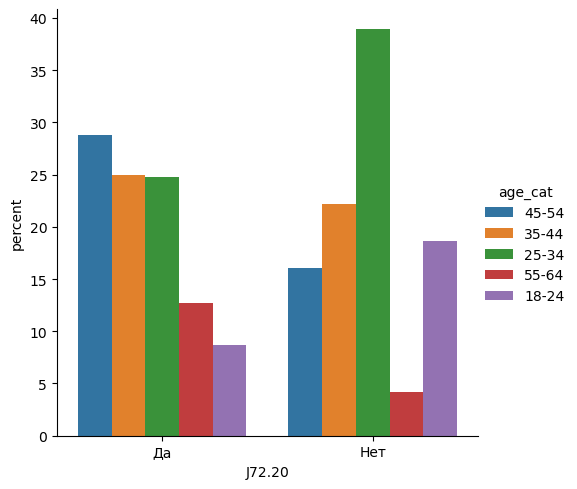

In [251]:
col='age_cat'
#df_4 = df_3[df_3[col].notnull()]
#df_4 = df_4[df_4[col]<=10]
#df_4 = df_3[df_3['J72.20']<=10]
#df_4['J72.20']=df_4['J72.20'].map(meta.variable_value_labels['J72.20'])
#df_4[col]=df_4[col].map(meta.variable_value_labels[col])
# sns.countplot(data=df_1[df_1['AGE']<100], y=col, hue='J72.25')
x='J72.20'
y=col
df_4=df_3[df_3[col]!='Unknown']
data = (df_4
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index())

#((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar')
p = sns.catplot(x=x, y="percent", hue=y, data=data, kind='bar')#.set(title = meta.column_names_to_labels[col])
#_ = plt.setp(p.get_xticklabels(), rotation=90)  # Rotate labels
#p.set_xticklabels(rotation=10)


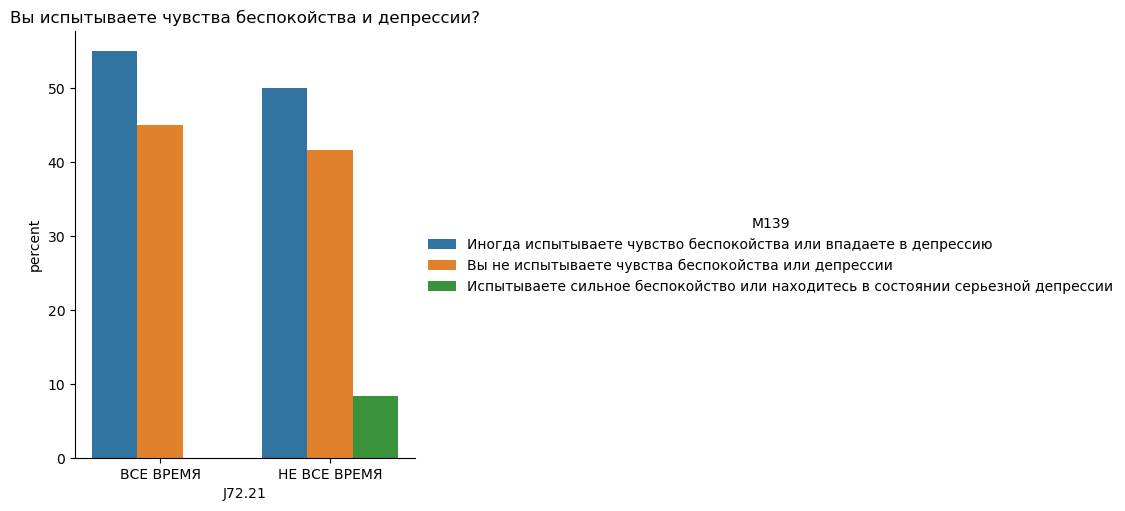

In [153]:
col='M139'
df_4 = df_3[df_3[col].notnull()]
df_4 = df_4[df_4[col]<=10]
df_4 = df_4[df_4['J72.21']<=10]
df_4['J72.21']=df_4['J72.21'].map(meta.variable_value_labels['J72.21'])
df_4[col]=df_4[col].map(meta.variable_value_labels[col])
# sns.countplot(data=df_1[df_1['AGE']<100], y=col, hue='J72.25')
x='J72.21'
y=col
data = (df_4
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index())

#((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar')
p = sns.catplot(x=x, y="percent", hue=y, data=data, kind='bar').set(title = meta.column_names_to_labels[col])
#_ = plt.setp(p.get_xticklabels(), rotation=90)  # Rotate labels
#p.set_xticklabels(rotation=10)

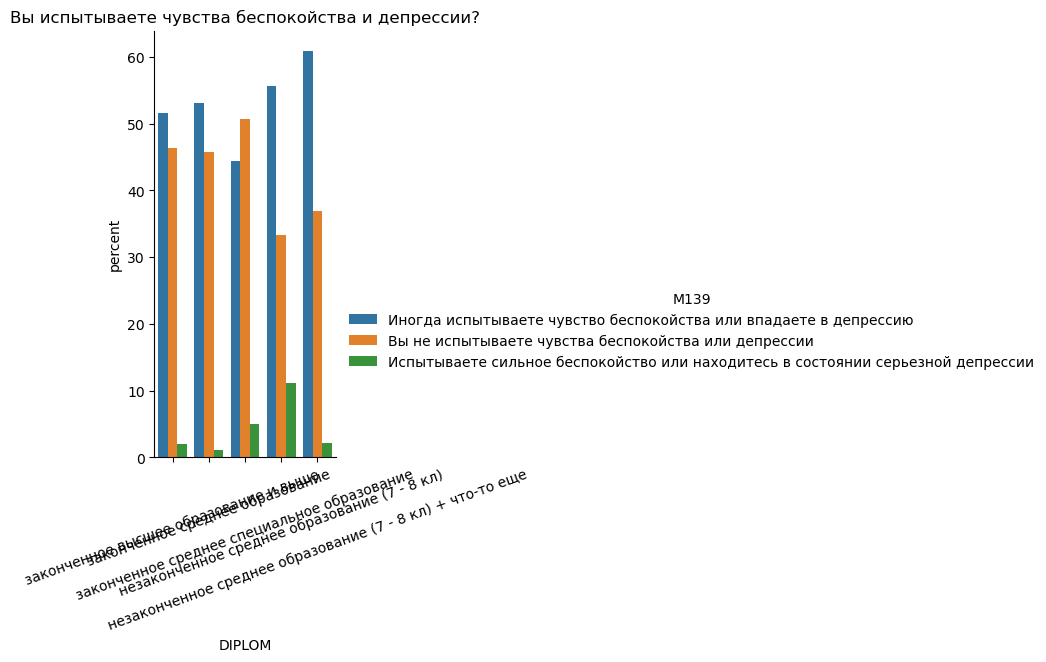

In [156]:
col='M139'
df_4 = df_3[df_3[col].notnull()]
df_4 = df_4[df_4[col]<=10]
df_4 = df_4[df_4['DIPLOM']<=10]
df_4['DIPLOM']=df_4['DIPLOM'].map(meta.variable_value_labels['DIPLOM'])
df_4[col]=df_4[col].map(meta.variable_value_labels[col])
# sns.countplot(data=df_1[df_1['AGE']<100], y=col, hue='J72.25')
x='DIPLOM'
y=col
data = (df_4
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index())

#((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar')
p = sns.catplot(x=x, y="percent", hue=y, data=data, kind='bar').set(title = meta.column_names_to_labels[col])
#_ = plt.setp(p.get_xticklabels(), rotation=90)  # Rotate labels
p.set_xticklabels(rotation=20)

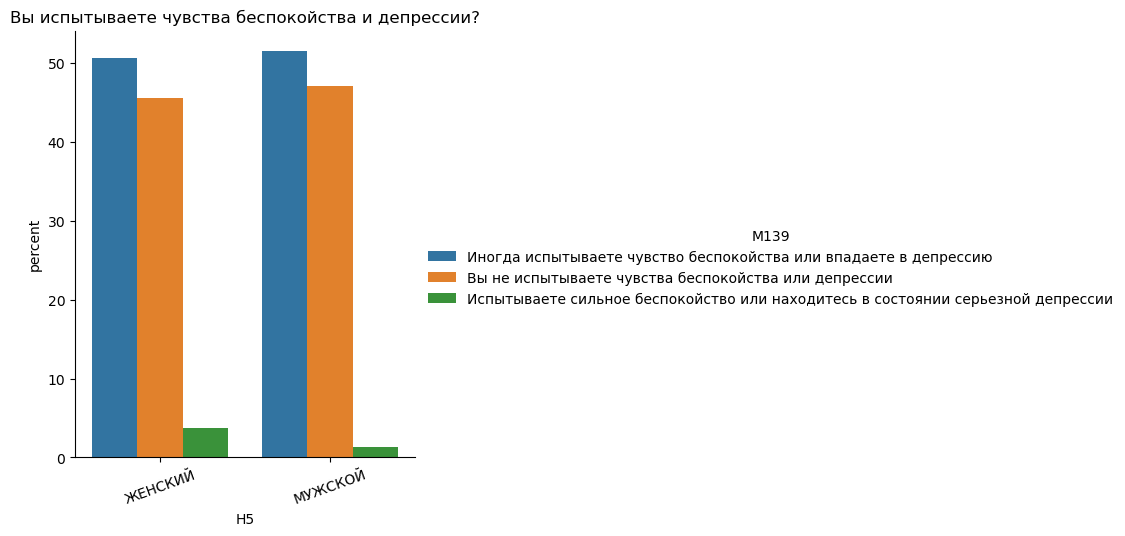

In [157]:
col='M139'
df_4 = df_3[df_3[col].notnull()]
df_4 = df_4[df_4[col]<=10]
df_4 = df_4[df_4['H5']<=10]
df_4['H5']=df_4['H5'].map(meta.variable_value_labels['H5'])
df_4[col]=df_4[col].map(meta.variable_value_labels[col])
# sns.countplot(data=df_1[df_1['AGE']<100], y=col, hue='J72.25')
x='H5'
y=col
data = (df_4
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index())

#((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar')
p = sns.catplot(x=x, y="percent", hue=y, data=data, kind='bar').set(title = meta.column_names_to_labels[col])
#_ = plt.setp(p.get_xticklabels(), rotation=90)  # Rotate labels
p.set_xticklabels(rotation=20)

In [209]:
len(categ_features)+len(numeric_features) + 1

50

In [247]:
df_3['J72.20']

0       Да
1       Да
2       Да
3       Да
4       Да
        ..
5521    Да
5522    Да
5523    Да
5524    Да
5525    Да
Name: J72.20, Length: 5526, dtype: object